In [1]:
import pandas as pd
import numpy as np
import scipy as sp

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import mpl_toolkits as mplot3d

pd.set_option("display.max_columns", None)
pd.set_option('future.no_silent_downcasting', True)

from tqdm import tqdm
tqdm.pandas()

# DATA WRANGLING

## EURO

In [2]:
# testing = pd.read_spss(rf"{import_folder_path}/Risikoatlas_EuropeanSurvey_translated_allcountries.sav")

In [3]:
import_folder_path = rf"../europe"
df00 = pd.read_pickle(rf"{import_folder_path}/Europe_dataset.pkl")

In [4]:
df00

,responseid,country_text,country,age,gender_text,age_rec,isced,income,wealth,Certainty_5,Uncertainty_2,RiskComprehension_5,GraphLiteracy_3,Numeracy_3,Bayesianreasoning_1,Certainty_%,Uncertainty_%,RiskComprehension_%,GraphLiteracy_%,Numeracy_%,Bayesianreasoning_%,TotalScore_19,TotalScore_%,certainty1,certainty2,certainty3,certainty4,certainty5,uncertainty1,uncertainty2,numeracy1,numeracy2,numeracy3,graph1,graph2,graph3,riskcomprehension1,riskcomprehension2,riskcomprehension3,riskcomprehension4,riskcomprehension5,bayesian1,income_tercile,income_quartile,wealth_quartile,risklit_quartile_income,risklit_quartile_wealth
0,1,UK,9.0,36.0,Female,3,1,3.0,20000.0,5,2,3,3,3,1,100.0,100.0,60.0,100.000000,100.000000,100.0,17,89.473684,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,2,3,2.0,4.0,4.0
1,2,France,12.0,69.0,Male,4,1,3.0,300000.0,1,1,4,2,3,1,20.0,50.0,80.0,66.666667,100.000000,100.0,12,63.157895,0,0,0,0,1,0,1,1,1,1,0,1,1,1,1,1,1,0,1,2,3,4.0,3.0,3.0
2,5,Spain,10.0,49.0,Female,3,1,1.0,100000.0,4,1,2,1,1,0,80.0,50.0,40.0,33.333333,33.333333,0.0,9,47.368421,1,1,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0,0,1,1,3.0,2.0,2.0
3,8,France,12.0,30.0,Female,2,1,3.0,-1.0,1,1,3,3,2,0,20.0,50.0,60.0,100.000000,66.666667,0.0,10,52.631579,0,0,0,0,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,2,3,NaN,2.0,NaN
4,9,Spain,10.0,37.0,Male,3,1,2.0,10000.0,3,1,5,3,3,0,60.0,50.0,100.0,100.000000,100.000000,0.0,15,78.947368,1,0,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,2,2.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3901,15636,Spain,10.0,61.0,Female,4,3,2.0,-1.0,1,0,2,0,1,0,20.0,0.0,40.0,0.000000,33.333333,0.0,4,21.052632,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,2,NaN,1.0,NaN
3902,15717,UK,9.0,26.0,Female,2,2,1.0,-1.0,2,1,3,3,3,0,40.0,50.0,60.0,100.000000,100.000000,0.0,12,63.157895,0,1,0,0,1,0,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,NaN,3.0,NaN
3903,15788,Germany,7.0,21.0,Male,2,1,4.0,-1.0,2,1,4,2,0,0,40.0,50.0,80.0,66.666667,0.000000,0.0,9,47.368421,0,0,0,1,1,0,1,0,0,0,1,0,1,1,1,1,0,1,0,2,4,NaN,2.0,NaN
3904,15843,France,12.0,18.0,Female,2,2,1.0,-1.0,1,1,3,3,2,0,20.0,50.0,60.0,100.000000,66.666667,0.0,10,52.631579,0,0,0,0,1,0,1,1,0,1,1,1,1,1,1,1,0,0,0,1,1,NaN,2.0,NaN


In [5]:
def remove_indexname(series): # removes index name
    series.index.name = None
    series.name = None
    return series.to_string()

# print("Total Observations:", df00["Q1"].count())

print(f'\nGender:\n{remove_indexname(df00["gender_text"].value_counts())}')
print('-' * 100)
print(f'ISCED:\n{remove_indexname(df00["isced"].value_counts().sort_index())}')
print('-' * 100)
# print(f'Income:\n{remove_indexname(df00["income_text"].value_counts().sort_index())}')
print(f'\nIncome_code:\n{remove_indexname(df00["income"].value_counts().sort_index())}')
print('-' * 100)
print(f'Countries:\n{remove_indexname(df00["country_text"].value_counts())}')
print(f'\nCountries_code:\n{remove_indexname(df00["country"].value_counts())}')
print('-' * 100)



# print(f'\nOccupation:\n{remove_indexname(df0["Q4a"].value_counts())}')
# print(f'\nEducation:\n{remove_indexname(df0["Q3"].value_counts())}')


Gender:
Female    2000
Male      1906
----------------------------------------------------------------------------------------------------
ISCED:
1    1197
2    1795
3     914
----------------------------------------------------------------------------------------------------

Income_code:
-1.0    535
 1.0    853
 2.0    785
 3.0    654
 4.0    480
 5.0    359
 6.0    240
----------------------------------------------------------------------------------------------------
Countries:
France     677
Poland     656
UK         652
Spain      646
Sweden     643
Germany    632

Countries_code:
12.0    677
21.0    656
9.0     652
10.0    646
29.0    643
7.0     632
----------------------------------------------------------------------------------------------------


In [6]:
euro0 = df00.copy()

---

# India - Dynata

In [7]:
import_folder_path = rf"../india_dynata"

df00 = pd.read_pickle(rf"{import_folder_path}/India_Dynata_dataset.pkl")

In [8]:
def remove_indexname(series): # removes index name
    series.index.name = None
    series.name = None
    return series.to_string()

print("Total Observations:", df00["gender_text"].count())

print(f'\nGender:\n{remove_indexname(df00["gender_text"].value_counts())}')
# print(f'\nOccupation:\n{remove_indexname(df00["Q4a"].value_counts())}')
# print(f'\nEducation:\n{remove_indexname(df00["Q3"].value_counts())}')
print(f'\nISCED:\n{remove_indexname(df00["isced"].value_counts())}')
print(f'\nIncome:\n{remove_indexname(df00["income"].value_counts().iloc[[1, 0, 2, 3, 4, 5]])}')

Total Observations: 699

Gender:
Male      361
Female    338

ISCED:
1    252
2    241
3    206

Income:
1    194
2    221
3    114
4     76
5     52
6     42


In [9]:
dyn0 = df00.copy()

---

---

## NO WEALTH WINSORIZATION

In [10]:
## Winsorizing Wealth

from scipy.stats.mstats import winsorize

def winsorize_output(sample, variable, limits = [0, 0]):
    sample = sample.copy()
    sample[f"nonwinsorised_{variable}"] = sample[variable]
    sample[f"winsorised_{variable}"] = winsorize(np.array(sample[f"nonwinsorised_{variable}"]), limits = limits, inclusive = [False, False])
    sample[[f"nonwinsorised_{variable}", f"winsorised_{variable}"]].describe()
    print(sample[[f"winsorised_{variable}", f"nonwinsorised_{variable}"]].describe())
    
    fig, axes = plt.subplots(1, 2, figsize = (12, 6))
    sns.kdeplot(data = sample[f"nonwinsorised_{variable}"].replace([np.inf, -np.inf], np.nan), ax = axes[0])
    axes[0].set_title(f'Nonwinsorised {variable}')
    sns.kdeplot(data = sample[f"winsorised_{variable}"].replace([np.inf, -np.inf], np.nan), ax = axes[1])
    axes[1].set_title(f'Winsorized {variable}')
    plt.tight_layout()
    plt.show()

    sample[variable] = sample[f"winsorised_{variable}"]
    return sample[variable]

       winsorised_wealth  nonwinsorised_wealth
count       6.990000e+02          6.990000e+02
mean        1.628566e+08          1.628566e+08
std         3.794346e+09          3.794346e+09
min         0.000000e+00          0.000000e+00
25%         1.000000e+05          1.000000e+05
50%         6.000000e+05          6.000000e+05
75%         4.000000e+06          4.000000e+06
max         1.000000e+11          1.000000e+11


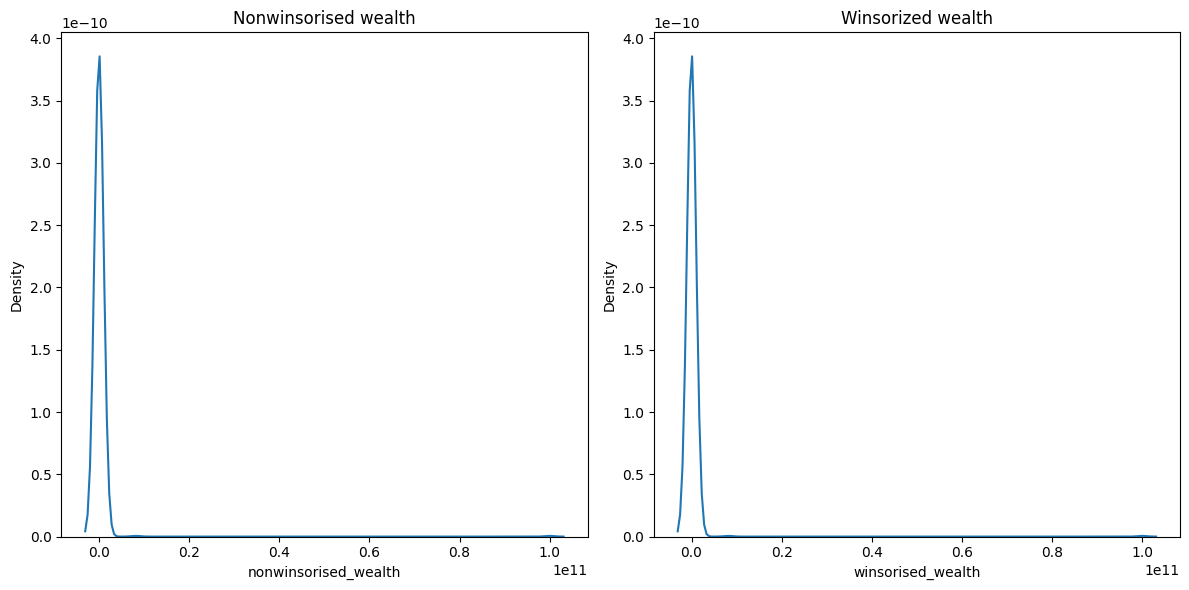

In [11]:
winsorized_wealth = winsorize_output(dyn0, "wealth", [0, 0])

In [12]:
# Using winsorised wealth as wealth
dyn0["wealth"] = winsorized_wealth

---

---

In [13]:
main = pd.concat([dyn0, euro0]).reset_index(drop = True)

In [14]:
main

,responseid,country_text,country,age,gender_text,age_rec,isced,income,wealth,Certainty_5,Uncertainty_2,RiskComprehension_5,GraphLiteracy_3,Numeracy_3,Bayesianreasoning_1,Certainty_%,Uncertainty_%,RiskComprehension_%,GraphLiteracy_%,Numeracy_%,Bayesianreasoning_%,TotalScore_19,TotalScore_%,RiskAssets_%,SafeAssets_%,RiskAlignment,RiskAlignment_residual,RiskAlignment_felix,RiskAppetite1_%,RiskAppetite_7,RiskAppetite2_%,InvestmentXP_4,FinancialPlanning1_6,FinancialPlanning2_6,FinancialPlanning1_%,FinancialPlanning2_%,FinancialLiteracy_%,FinancialLiteracy_3,CRTScore_3,CRTScore_%,certainty1,certainty2,certainty3,certainty4,certainty5,uncertainty1,uncertainty2,numeracy1,numeracy2,numeracy3,graph1,graph2,graph3,riskcomprehension1,riskcomprehension2,riskcomprehension3,riskcomprehension4,riskcomprehension5,bayesian1,financialplanning_1,financialplanning_2,financialplanning_3,financialplanning_4,financialplanning_5,financialplanning_6,financialplanning_emergency,financialplanning_retirement,savings_bank,fixed_deposits,recurring_deposits,gov_bonds,corp_bonds,mutual_funds,stocks,real_estate,commodities,other_invest,savings_bank_dummy,gov_bonds_dummy,mutual_funds_dummy,stocks_dummy,investment_behaviour,risky_investments,investments,income_tercile,income_quartile,wealth_quartile,risklit_quartile_income,risklit_quartile_wealth
0,0,India,0.0,30.0,Male,2,1,2.0,5000000.0,2.0,0.0,1.0,2.0,1.0,1.0,40.0,0.0,20.0,66.666667,33.333333,100.0,7.0,36.842105,50.0,50.0,71.428571,-21.428571,3.50,71.428571,5.0,75.0,3.0,5.500000,5.500,91.666667,91.666667,66.666667,2.0,1.0,33.333333,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,5.0,5.0,5.0,6.0,6.0,6.0,5.0,6.0,25.0,15.0,10.0,0.0,0.0,15.0,15.0,15.0,5.0,0.0,1.0,0.0,1.0,1.0,3.0,50.0,50.0,2,2,4.0,2.0,2.0
1,1,India,0.0,53.0,Male,3,1,4.0,9000000.0,4.0,0.0,2.0,1.0,0.0,1.0,80.0,0.0,40.0,33.333333,0.000000,100.0,8.0,42.105263,80.0,20.0,71.428571,8.571429,5.60,71.428571,5.0,50.0,2.0,3.833333,4.125,63.888889,68.750000,100.000000,3.0,1.0,33.333333,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,4.0,2.0,2.0,5.0,5.0,5.0,4.0,6.0,10.0,10.0,0.0,0.0,0.0,10.0,0.0,40.0,20.0,10.0,1.0,0.0,1.0,0.0,2.0,80.0,80.0,3,3,4.0,2.0,2.0
2,2,India,0.0,43.0,Male,3,2,1.0,2200000.0,4.0,1.0,3.0,3.0,2.0,0.0,80.0,50.0,60.0,100.000000,66.666667,0.0,13.0,68.421053,0.0,100.0,85.714286,-85.714286,0.00,85.714286,6.0,50.0,2.0,4.666667,4.625,77.777778,77.083333,66.666667,2.0,0.0,0.000000,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,5.0,4.0,5.0,4.0,5.0,5.0,5.0,4.0,80.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,3.0,4.0,4.0
3,3,India,0.0,32.0,Male,2,2,3.0,8000000.0,4.0,0.0,1.0,1.0,3.0,0.0,80.0,0.0,20.0,33.333333,100.000000,0.0,9.0,47.368421,75.0,25.0,100.000000,-25.000000,5.25,100.000000,7.0,100.0,4.0,5.500000,5.625,91.666667,93.750000,100.000000,3.0,0.0,0.000000,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6.0,5.0,5.0,6.0,6.0,5.0,6.0,6.0,10.0,5.0,5.0,5.0,0.0,40.0,5.0,0.0,20.0,10.0,1.0,1.0,1.0,1.0,4.0,75.0,80.0,2,3,4.0,3.0,3.0
4,4,India,0.0,31.0,Female,2,1,3.0,35000000.0,3.0,1.0,2.0,1.0,1.0,0.0,60.0,50.0,40.0,33.333333,33.333333,0.0,8.0,42.105263,34.0,66.0,85.714286,-51.714286,2.38,85.714286,6.0,100.0,4.0,5.000000,5.000,83.333333,83.333333,33.333333,1.0,0.0,0.000000,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,4.0,5.0,4.0,5.0,6.0,6.0,5.0,5.0,20.0,25.0,5.0,10.0,6.0,5.0,5.0,15.0,9.0,0.0,1.0,1.0,1.0,1.0,4.0,34.0,50.0,2,3,4.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4600,15636,Spain,10.0,61.0,Female,4,3,2.0,-1.0,1.0,0.0,2.0,0.0,1.0,0.0,20.0,0.0,40.0,0.000000,33.333333,0

In [15]:
main.to_excel("Euro_Dynata_dataset.xlsx")
aa

NameError: name 'aa' is not defined

--------------------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------------------

In [ ]:
#Global Vras:
facet_cols = ["Certainty_5", "Uncertainty_2", "RiskComprehension_5", "GraphLiteracy_3",
              "Numeracy_3", "Bayesianreasoning_1"]

facet_percent_cols = ["Certainty_%", "Uncertainty_%", "RiskComprehension_%", "GraphLiteracy_%",
                      "Numeracy_%", "Bayesianreasoning_%",]

# Study 2 - Europe

## Table 1.1 - Per country: Mean Total Score + SD

Text(0, 0.5, 'Mean Total score')

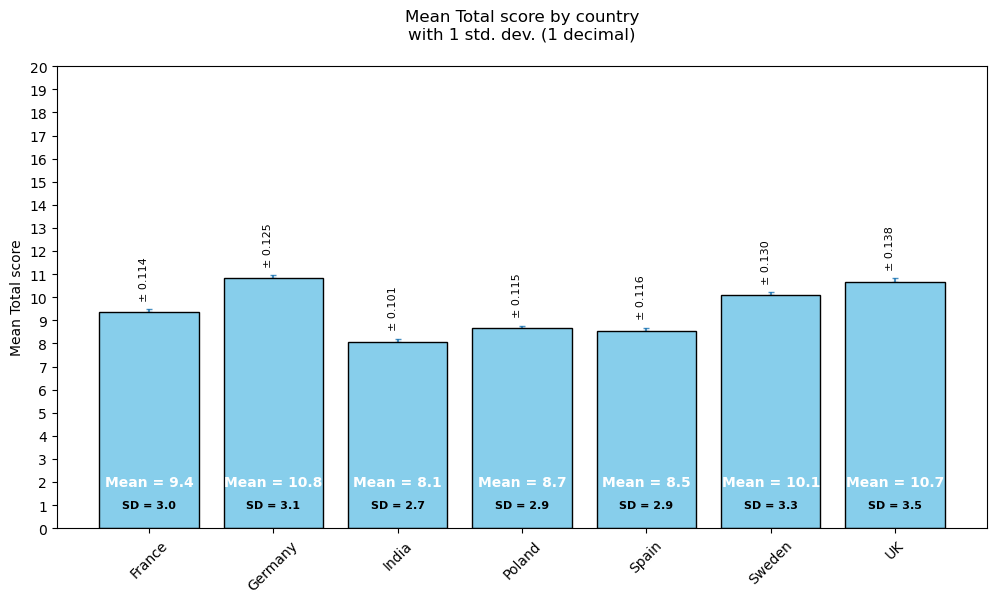

In [ ]:
fig, axes = plt.subplots(1, 1, figsize = [12, 6])

mean_scores = main.groupby("country_text")["TotalScore_19"].mean().sort_index()
std_scores = main.groupby("country_text")["TotalScore_19"].std().reindex(mean_scores.index)
sem_scores = main.groupby("country_text")["TotalScore_19"].sem().reindex(mean_scores.index)

axes.bar(mean_scores.index, mean_scores.values, color="skyblue", edgecolor='black')
axes.errorbar(mean_scores.index, mean_scores.values, yerr = [np.zeros_like(sem_scores), sem_scores],
                     fmt = "none", capsize = 2, alpha = 0.8, zorder = 0)

axes.set_yticks(np.arange(0, 21))
axes.tick_params(axis = "x", rotation = 45)

for i, (mean, std, sem) in enumerate(zip(mean_scores.values, std_scores.values, sem_scores.values)):
    axes.text(i, mean + 0.5, f"± {sem:.3f}", ha = "right", va = "bottom", fontsize=8, color="black", rotation = 90)
    axes.text(i, 2, f"Mean = {mean:.1f}", ha = "center", va = "center",
              color='white', fontsize=10, fontweight='bold')
    axes.text(i, 1, f"SD = {std:.1f}", ha = "center", va = "center",
              color='black', fontsize=8, fontweight='bold')
    

axes.set_title("Mean Total score by country\nwith 1 std. dev. (1 decimal)", pad = 20)
axes.set_ylabel("Mean Total score")

----------------------------------

## Table 1.2 - Per country: Mean Facet Scores + SD (Ver. 1)

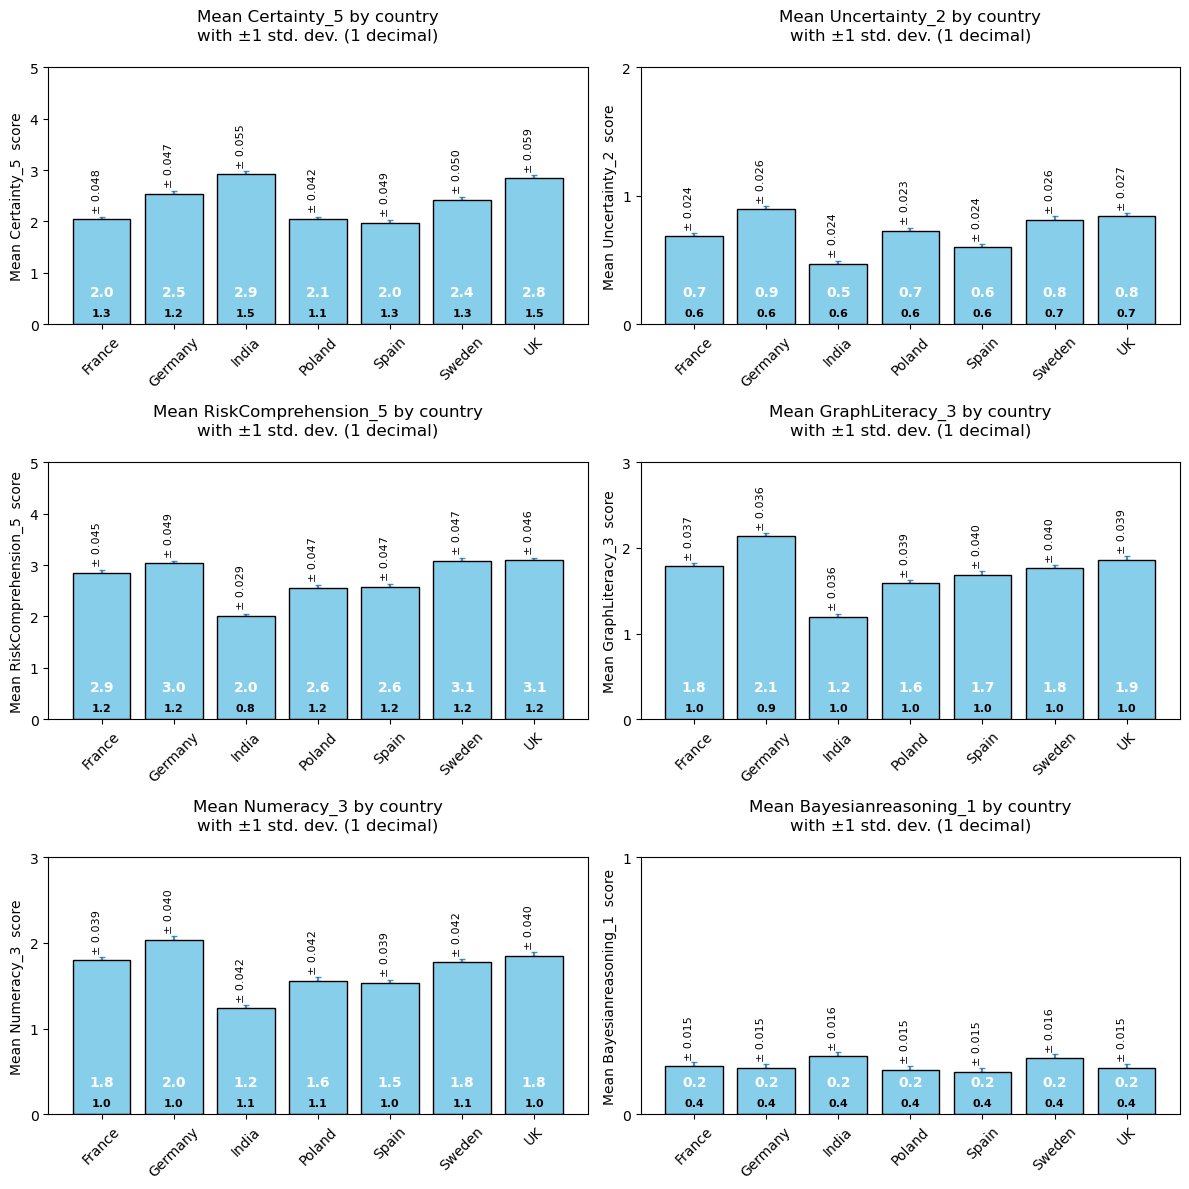

In [ ]:
fig, axes = plt.subplots(3, 2, figsize = [12, 12])
axes = axes.flatten()

for i, facet in enumerate(facet_cols):
    mean_scores = main.groupby("country_text")[facet].mean().sort_index()
    std_scores = main.groupby("country_text")[facet].std().reindex(mean_scores.index)
    sem_scores = main.groupby("country_text")[facet].sem().reindex(mean_scores.index)
    
    axes[i].bar(mean_scores.index, mean_scores.values, color="skyblue", edgecolor='black')
    axes[i].errorbar(mean_scores.index, mean_scores.values, yerr = [np.zeros_like(sem_scores), sem_scores],
                     fmt = "none", capsize = 2, alpha = 0.8, zorder = 0)

    y_max = int(facet.split("_")[1])
    axes[i].set_yticks(np.arange(0, y_max + 1))
    axes[i].tick_params(axis = "x", rotation = 45)
    
    for j, (mean, std, sem) in enumerate(zip(mean_scores.values, std_scores.values, sem_scores.values)):
        axes[i].text(j, mean + 0.025 * y_max, f"± {sem:.3f}", ha = "right", va = "bottom", fontsize=8, color="black", rotation = 90)
        axes[i].text(j, 0.1 * y_max, f"{mean:.1f}", ha = "center", va = "bottom",
                     color='white', fontsize=10, fontweight='bold')
        axes[i].text(j, 0.025 * y_max, f"{std:.1f}", ha = "center", va = "bottom",
                     color='black', fontsize=8, fontweight='bold')

        
    
    axes[i].set_title(f"Mean {facet} by country\nwith ±1 std. dev. (1 decimal)", pad = 20)
    axes[i].set_ylabel(f"Mean {facet}  score")


plt.tight_layout()
plt.show()

## Table 1.2 - Per country: Mean Facet Scores + SD (Ver. 2)

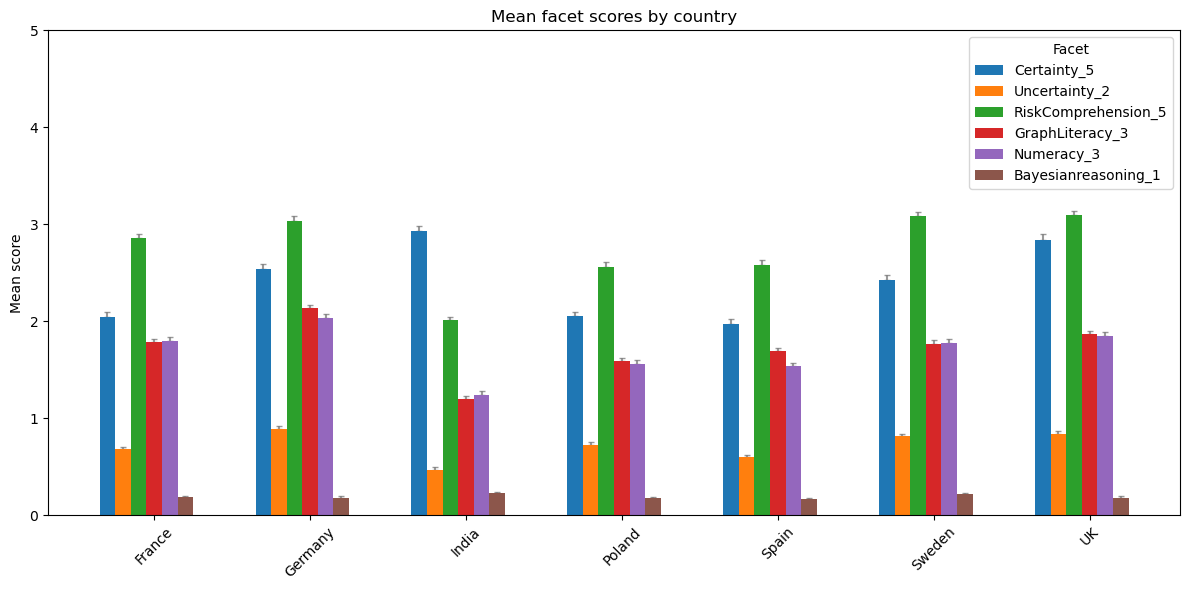

In [ ]:
fig, axes = plt.subplots(1, 1, figsize = [12, 6])

data_mean = main.groupby("country_text")[facet_cols].mean().sort_index()
data_std = main.groupby("country_text")[facet_cols].std().reindex(data_mean.index)
data_sem = main.groupby("country_text")[facet_cols].sem().reindex(data_mean.index)

countries = data_mean.index
x = np.arange(1, len(data_mean.index) + 1)
width = 0.1

for i, facet in enumerate(facet_cols):
    mean_facet_scores = data_mean[facet]
    sem_facet_scores = data_sem[facet]

    offset = (- len(facet_cols)/ 2 + i) * width
    axes.bar(x + offset , mean_facet_scores, width, label = facet)
    axes.errorbar(x + offset , mean_facet_scores, yerr = [np.zeros_like(sem_facet_scores), sem_facet_scores],
                  fmt = "none", capsize = 2.5, alpha = 0.8, zorder = 0, ecolor = "grey")

axes.set_yticks(np.arange(6))
axes.set_xticks(x)
axes.set_xticklabels(countries, rotation = 45, ha = "center")

axes.set_ylabel("Mean score")
axes.set_title("Mean facet scores by country")
axes.legend(title="Facet", bbox_to_anchor=(1.0, 1))

plt.tight_layout()
plt.show()



---

---

## Table 1.3 - Per country: M proportion of maximum (Total Score) score + SD + Median

Text(0, 0.5, 'Mean % Total score')

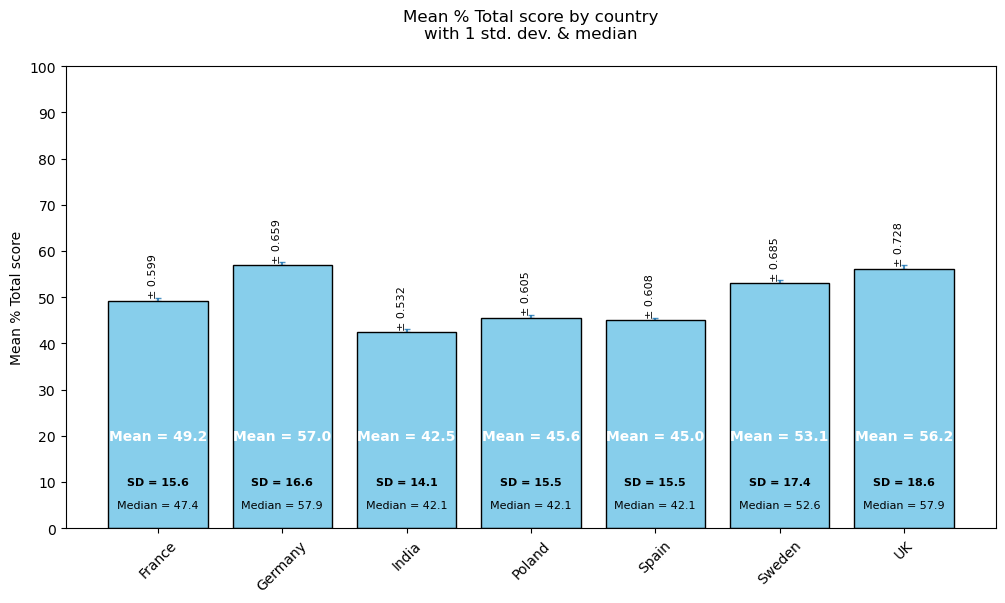

In [ ]:
fig, axes = plt.subplots(1, 1, figsize = [12, 6])

mean_scores = main.groupby("country_text")["TotalScore_%"].mean().sort_index()
std_scores = main.groupby("country_text")["TotalScore_%"].std().reindex(mean_scores.index)
sem_scores = main.groupby("country_text")["TotalScore_%"].sem().reindex(mean_scores.index)
med_scores = main.groupby("country_text")["TotalScore_%"].median().reindex(mean_scores.index)

axes.bar(mean_scores.index, mean_scores.values, color="skyblue", edgecolor='black')
axes.errorbar(mean_scores.index, mean_scores.values, yerr = [np.zeros_like(sem_scores), sem_scores],
                     fmt = "none", capsize = 2, alpha = 0.8, zorder = 0)

axes.set_yticks(np.arange(0, 101, step = 10))
axes.tick_params(axis = "x", rotation = 45)

for i, (mean, std, sem, med) in enumerate(zip(mean_scores.values, std_scores.values, sem_scores.values, med_scores.values)):
    axes.text(i, mean + 0.5, f"± {sem:.3f}", ha = "right", va = "bottom", fontsize=8, color="black", rotation = 90)
    axes.text(i, 20, f"Mean = {mean:.1f}", ha = "center", va = "center",
              color='white', fontsize=10, fontweight='bold')
    axes.text(i, 10, f"SD = {std:.1f}", ha = "center", va = "center",
              color='black', fontsize=8, fontweight='bold')
    axes.text(i, 5, f"Median = {med:.1f}", ha = "center", va = "center",
              color='black', fontsize=8)
    

axes.set_title("Mean % Total score by country\nwith 1 std. dev. & median", pad = 20)
axes.set_ylabel("Mean % Total score")

----------------------------------

## Table 1.4 - Per country: M proportion of Facet Scores + SD + Median (Ver. 1)

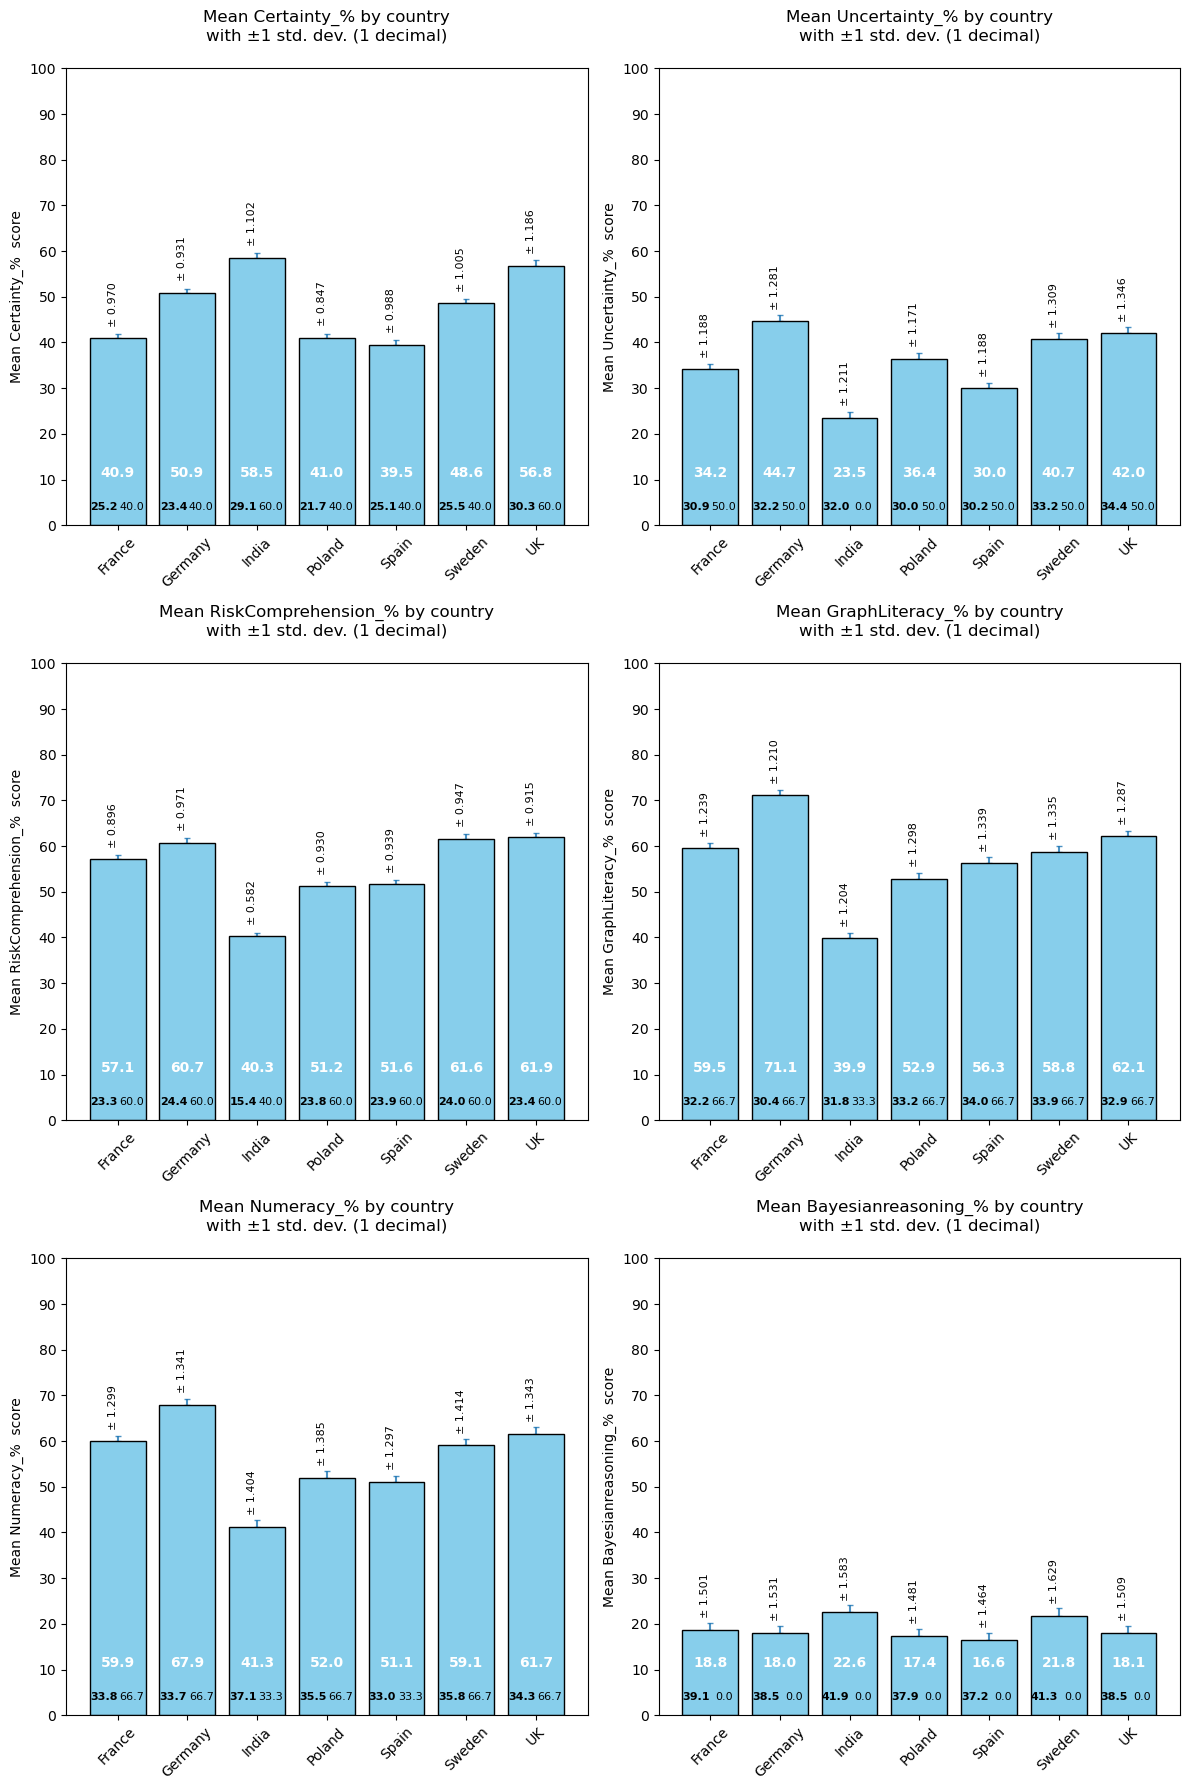

In [ ]:
fig, axes = plt.subplots(3, 2, figsize = [12, 18])
axes = axes.flatten()

for i, facet in enumerate(facet_percent_cols):
    mean_scores = main.groupby("country_text")[facet].mean().sort_index()
    std_scores = main.groupby("country_text")[facet].std().reindex(mean_scores.index)
    sem_scores = main.groupby("country_text")[facet].sem().reindex(mean_scores.index)
    med_scores = main.groupby("country_text")[facet].median().reindex(mean_scores.index)
    
    axes[i].bar(mean_scores.index, mean_scores.values, color="skyblue", edgecolor='black')
    axes[i].errorbar(mean_scores.index, mean_scores.values, yerr = [np.zeros_like(sem_scores), sem_scores],
                     fmt = "none", capsize = 2, alpha = 0.8, zorder = 0)

    y_max = 100
    axes[i].set_yticks(np.arange(0, y_max + 1, step = 10))
    axes[i].tick_params(axis = "x", rotation = 45)
    
    for j, (mean, std, sem, med) in enumerate(zip(mean_scores.values, std_scores.values, sem_scores.values, med_scores.values)):
        axes[i].text(j, mean + 0.025 * y_max, f"± {sem:.3f}", ha = "right", va = "bottom", fontsize=8, color="black", rotation = 90)
        axes[i].text(j, 0.1 * y_max, f"{mean:.1f}", ha = "center", va = "bottom",
                     color='white', fontsize=10, fontweight='bold')
        axes[i].text(j - 0.2, 0.03 * y_max, f"{std:.1f}", ha = "center", va = "bottom",
                     color='black', fontsize=8, fontweight='bold')
        axes[i].text(j + 0.2, 0.03 * y_max, f"{med:.1f}", ha = "center", va = "bottom",
                     color='black', fontsize=8)

        
    
    axes[i].set_title(f"Mean {facet} by country\nwith ±1 std. dev. (1 decimal)", pad = 20)
    axes[i].set_ylabel(f"Mean {facet}  score")


plt.tight_layout()
plt.show()

## Table 1.4 - Per country: M proportion of Facet Scores + SD + Median (Ver. 2)

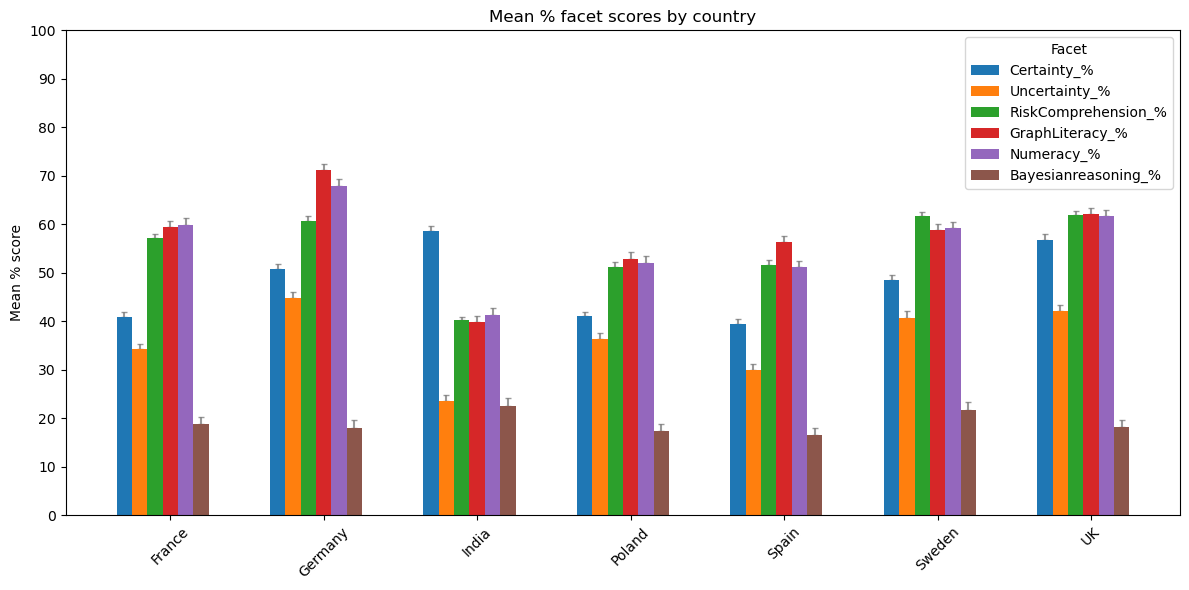

In [ ]:
fig, axes = plt.subplots(1, 1, figsize = [12, 6])

data_mean = main.groupby("country_text")[facet_percent_cols].mean().sort_index()
data_std = main.groupby("country_text")[facet_percent_cols].std().reindex(data_mean.index)
data_sem = main.groupby("country_text")[facet_percent_cols].sem().reindex(data_mean.index)

countries = data_mean.index
x = np.arange(1, len(data_mean.index) + 1)
width = 0.1

for i, facet in enumerate(facet_percent_cols):
    mean_facet_scores = data_mean[facet]
    sem_facet_scores = data_sem[facet]

    offset = (- len(facet_cols)/ 2 + i) * width
    axes.bar(x + offset , mean_facet_scores, width, label = facet)
    axes.errorbar(x + offset , mean_facet_scores, yerr = [np.zeros_like(sem_facet_scores), sem_facet_scores],
                  fmt = "none", capsize = 2.5, alpha = 0.8, zorder = 0, ecolor = "grey")

axes.set_yticks(np.arange(0, 101, step = 10))
axes.set_xticks(x)
axes.set_xticklabels(countries, rotation = 45, ha = "center")

axes.set_ylabel("Mean % score")
axes.set_title("Mean % facet scores by country")
axes.legend(title="Facet", bbox_to_anchor=(1.0, 1))

plt.tight_layout()
plt.show()



---

---

## Table 2.1 - Per country per income class: M proportion of maximum score+SD + Median facet scores (Ver. 1)

Note: Income Class has been filtered out of entries who opted out of disclosing their income

In [ ]:
income_filtered = main.loc[ ~(main["income"] == 0)].copy()
income_filtered.income.value_counts()

income
1.0    1047
2.0    1006
3.0     768
4.0     556
5.0     411
6.0     282
Name: count, dtype: int64

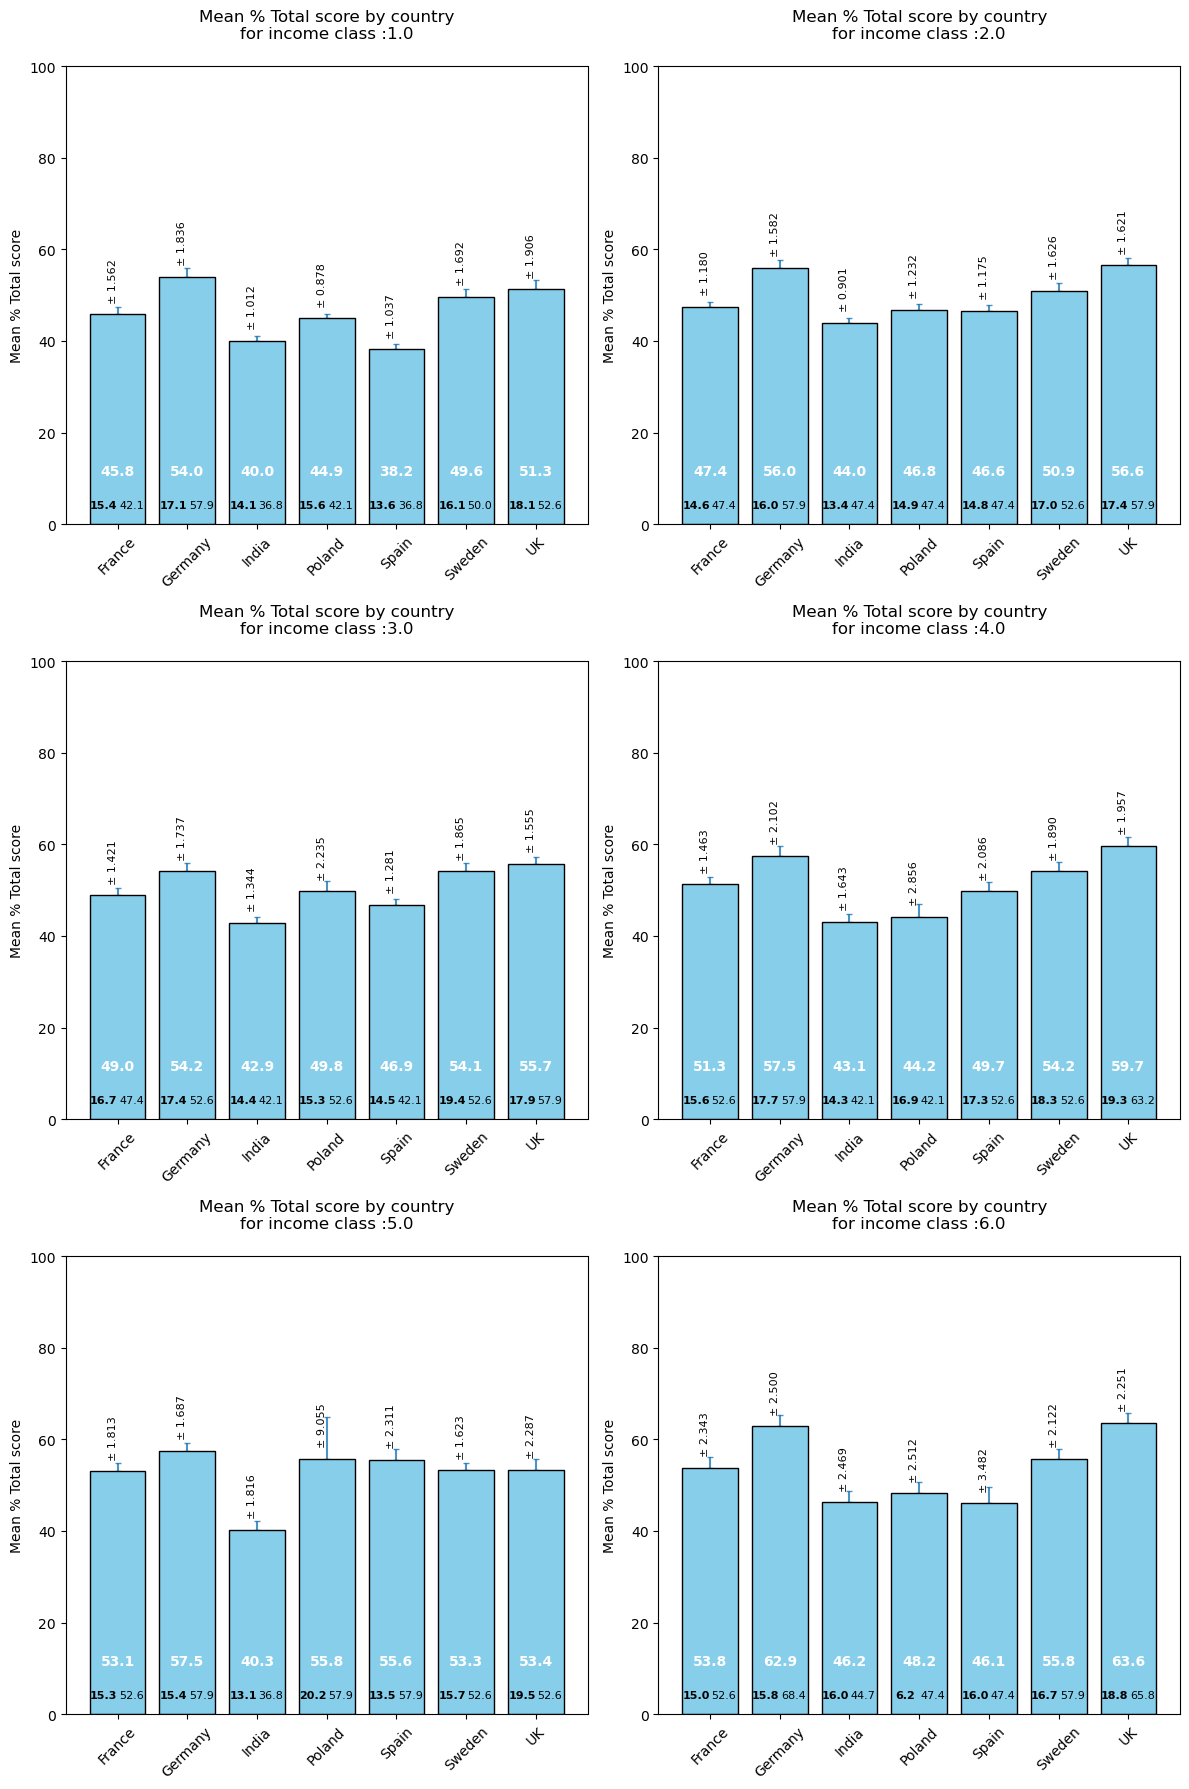

In [ ]:
fig, axes = plt.subplots(3, 2, figsize = [12, 18])
axes = axes.flatten()
income_classes = income_filtered.income.value_counts().sort_index().index.values

for i, income_class in enumerate(income_classes):
    sample = income_filtered.loc[ income_filtered["income"] == income_class].copy()
    
    mean_scores = sample.groupby("country_text")["TotalScore_%"].mean().sort_index()
    std_scores = sample.groupby("country_text")["TotalScore_%"].std().reindex(mean_scores.index)
    sem_scores = sample.groupby("country_text")["TotalScore_%"].sem().reindex(mean_scores.index)
    med_scores = sample.groupby("country_text")["TotalScore_%"].median().reindex(mean_scores.index)
    
    axes[i].bar(mean_scores.index, mean_scores.values, color="skyblue", edgecolor='black')
    axes[i].errorbar(mean_scores.index, mean_scores.values, yerr = [np.zeros_like(sem_scores), sem_scores],
                     fmt = "none", capsize = 2, alpha = 0.8, zorder = 0)

    y_max = 100
    axes[i].set_yticks(np.arange(0, 101, step = 20))
    axes[i].tick_params(axis = "x", rotation = 45)
    
    for j, (mean, std, sem, med) in enumerate(zip(mean_scores.values, std_scores.values, sem_scores.values, med_scores.values)):
        axes[i].text(j, mean + 0.025 * y_max, f"± {sem:.3f}", ha = "right", va = "bottom", fontsize=8, color="black", rotation = 90)
        axes[i].text(j, 0.1 * y_max, f"{mean:.1f}", ha = "center", va = "bottom",
                     color='white', fontsize=10, fontweight='bold')
        axes[i].text(j - 0.2, 0.03 * y_max, f"{std:.1f}", ha = "center", va = "bottom",
                     color='black', fontsize=8, fontweight='bold')
        axes[i].text(j + 0.2, 0.03 * y_max, f"{med:.1f}", ha = "center", va = "bottom",
                     color='black', fontsize=8)
        
    
    axes[i].set_title(f"Mean % Total score by country\nfor income class :{income_class}", pad = 20)
    axes[i].set_ylabel("Mean % Total score")

plt.tight_layout()
plt.show()

---

## Table 2.1 - Per country per income class: M proportion of maximum score + SD + Median scores (Ver. 2)

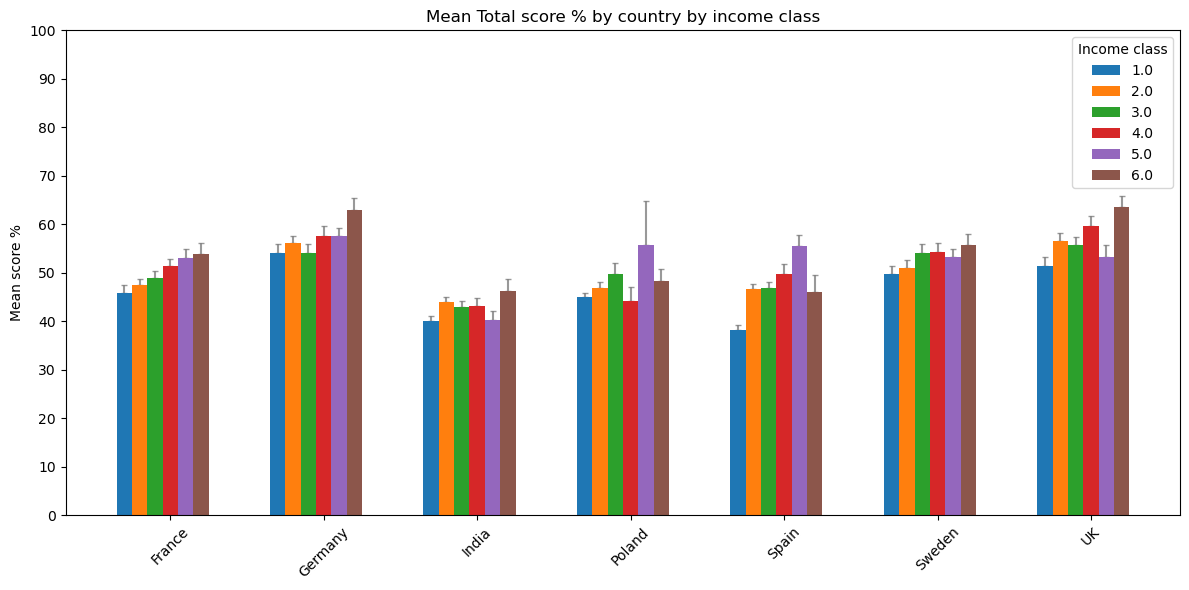

In [ ]:
fig, axes = plt.subplots(1, 1, figsize = [12, 6])
income_classes = income_filtered.income.value_counts().sort_index().index.values
sample = income_filtered.copy().reset_index()


data_mean = sample.groupby(["country_text", "income"])["TotalScore_%"].mean().sort_index()
data_std = sample.groupby(["country_text", "income"])["TotalScore_%"].std().reindex(data_mean.index)
data_sem = sample.groupby(["country_text", "income"])["TotalScore_%"].sem().reindex(data_mean.index)

countries = sorted(sample["country_text"].unique())
x = np.arange(1, len(countries) + 1)
width = 0.1

for j, income_class in enumerate(income_classes):
    mean_facet_scores = data_mean.xs(key=income_class, level="income")
    sem_facet_scores = data_sem.xs(key=income_class, level="income")

    offset = (- len(income_classes)/ 2 + j) * width
    axes.bar(x + offset , mean_facet_scores, width, label = str(income_class))
    axes.errorbar(x + offset , mean_facet_scores, yerr = [np.zeros_like(sem_facet_scores), sem_facet_scores],
                  fmt = "none", capsize = 2.5, alpha = 0.8, zorder = 0, ecolor = "grey")


axes.set_yticks(np.arange(0, 101, step = 10))
axes.set_xticks(x)
axes.set_xticklabels(countries, rotation = 45, ha = "center")

axes.set_ylabel(f"Mean score %")
axes.set_title(f"Mean Total score % by country by income class")
axes.legend(title="Income class", bbox_to_anchor=(1.0, 1))

plt.tight_layout()
plt.show()


---

---

## Table 2.2 - Per country per income class: M proportion of facet score  +SD + Median

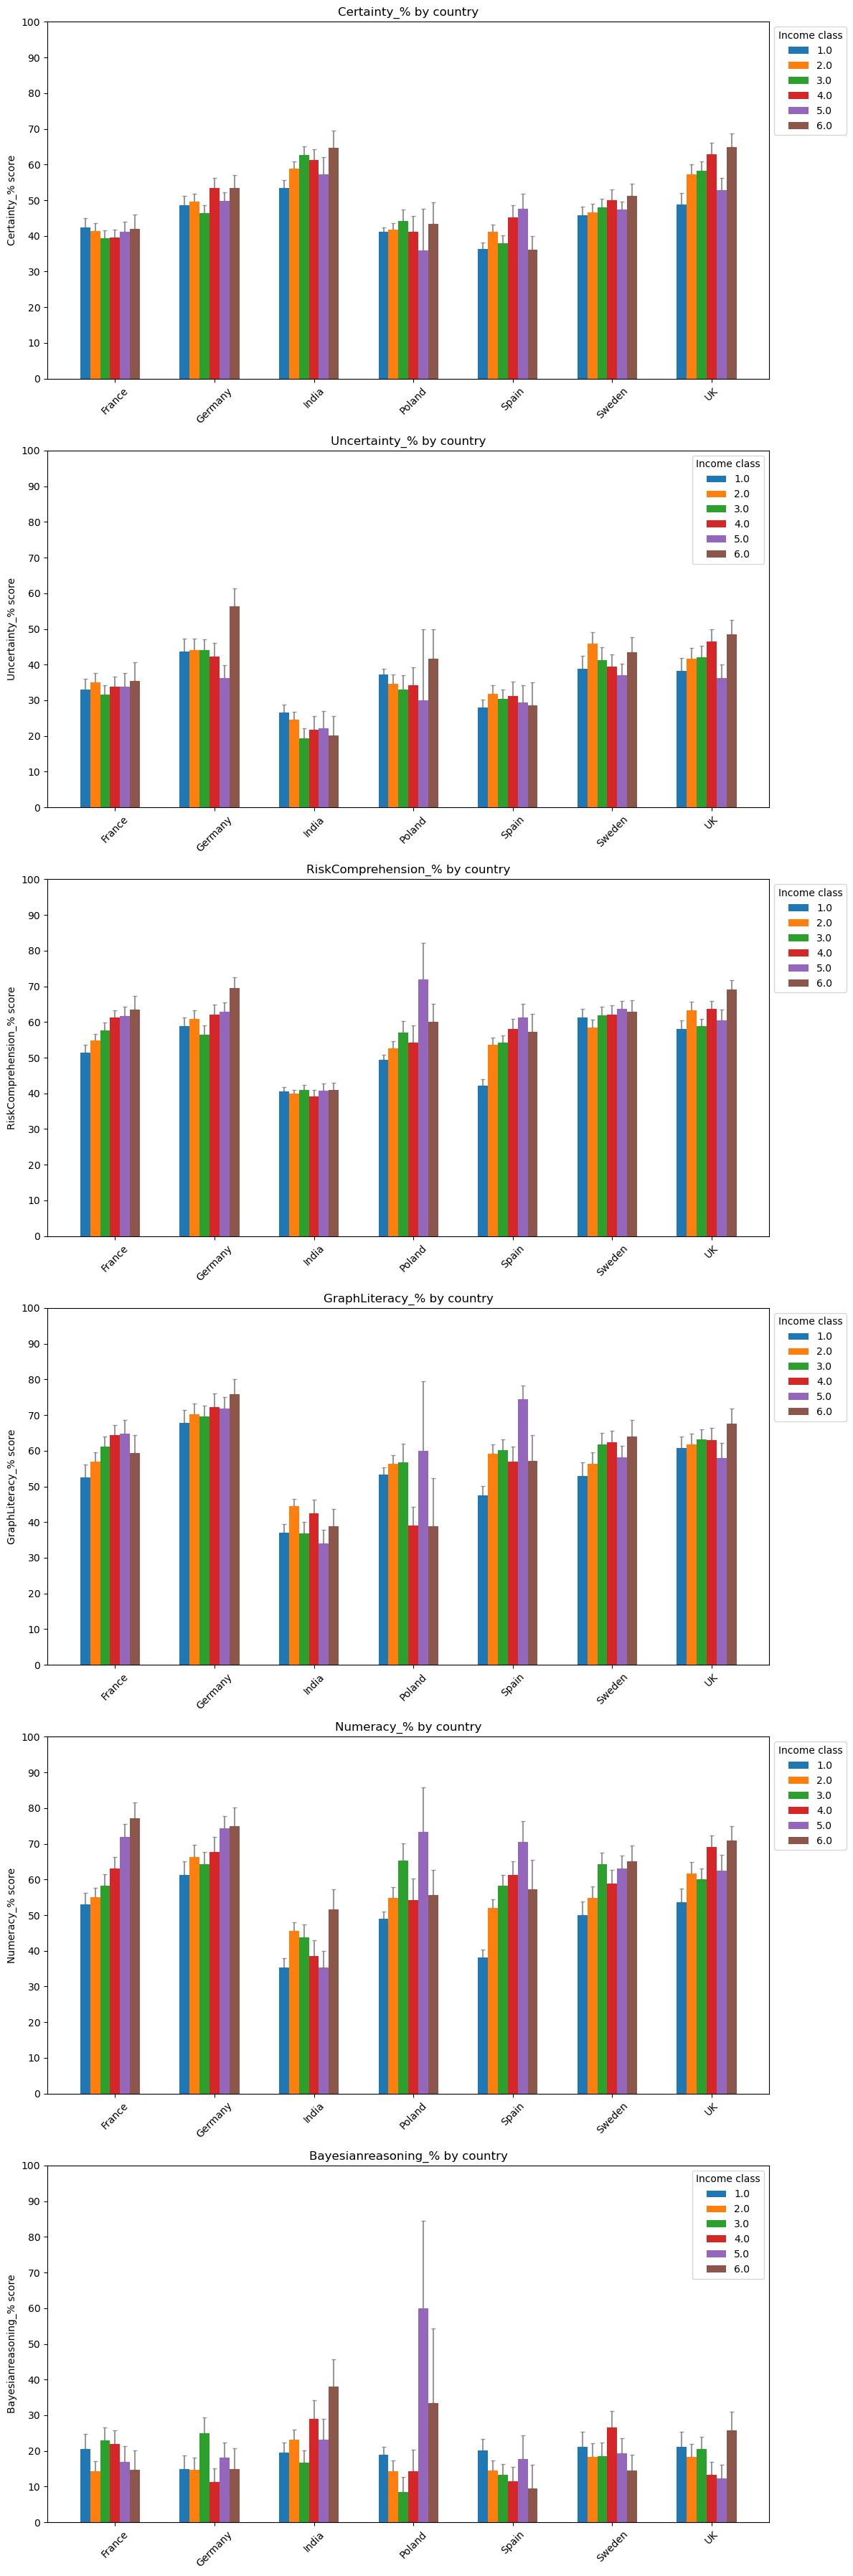

In [ ]:
fig, axes = plt.subplots(6, 1, figsize = [12, 6*6])

axes = axes.flatten()
income_classes = income_filtered.income.value_counts().sort_index().index.values

for i, facet in enumerate(facet_percent_cols):

    sample = income_filtered.loc[ :, [facet] + ["country_text", "income"]].copy().reset_index()
    
    data_mean = sample.groupby(["country_text", "income"])[facet].mean().sort_index()
    data_std = sample.groupby(["country_text", "income"])[facet].std().reindex(data_mean.index)
    data_sem = sample.groupby(["country_text", "income"])[facet].sem().reindex(data_mean.index)
    
    countries = sorted(sample["country_text"].unique())
    x = np.arange(1, len(countries) + 1)
    width = 0.1
    
    for j, income_class in enumerate(income_classes):
        mean_facet_scores = data_mean.xs(key=income_class, level="income")
        sem_facet_scores = data_sem.xs(key=income_class, level="income")
    
        offset = (- len(income_classes)/ 2 + j) * width
        axes[i].bar(x + offset , mean_facet_scores, width, label = str(income_class))
        axes[i].errorbar(x + offset , mean_facet_scores, yerr = [np.zeros_like(sem_facet_scores), sem_facet_scores],
                      fmt = "none", capsize = 2.5, alpha = 0.8, zorder = 0, ecolor = "grey")

    
    axes[i].set_yticks(np.arange(0, 101, step = 10))
    axes[i].set_xticks(x)
    axes[i].set_xticklabels(countries, rotation = 45, ha = "center")
    
    axes[i].set_ylabel(f"{facet} score")
    axes[i].set_title(f"{facet} by country")
    axes[i].legend(title="Income class", bbox_to_anchor=(1.0, 1))

plt.tight_layout()
plt.show()



---

---

## Table 3.1: (Countries pooled): Relationship to total sum score and controlling for education and age using income 

In [ ]:
income_filtered = main.loc[ ~(main["income"] == 0)].copy()

risklit_quartile = pd.qcut(income_filtered["TotalScore_19"],q = 4, labels = False ) + 1
income_filtered["risklit_quartile"] = risklit_quartile.copy()

data = income_filtered.copy()

# Age group 2 = 18 to 35 y/o
# Age group 3 = 36 to 55 y/o
# Age group 4 = 56 to 75 y/o 

age_rec = [0] + sorted(data["age_rec"].unique())
age_dict = {0:"ALL Age", 2:"Only 18-35",
            3:"Only 36-55", 4:"Only 56+"}

In [ ]:
# # fig, axes = plt.subplots(3, 1, figsize = [12, 4*6])
# # axes = axes.flatten()

# for i, age_class in enumerate(age_rec):
#     if age_class == 0:
#         sample = data.copy()
#     else:
#         sample = data.loc[ data["age_rec"] == age_class].copy()
#     sample_ready = sample.groupby("risklit_quartile")["income"].value_counts().to_frame().sort_index()
#     sample_ready = sample_ready.unstack(level = "income")
#     sample_ready.columns = sample_ready.columns.droplevel(0)
#     sample_ready.plot(kind='bar', stacked=True)

#     plt.ylabel("count each risk literacy quartile")
#     plt.xlabel("Risk quartile")
#     plt.title(f"Stacked bar chart: {age_dict[age_class]}")
#     plt.legend(title="Income class", bbox_to_anchor=(1, 1))
    
# plt.show()

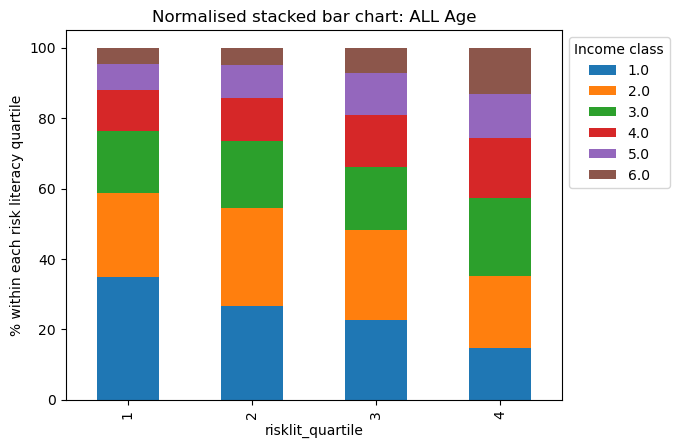

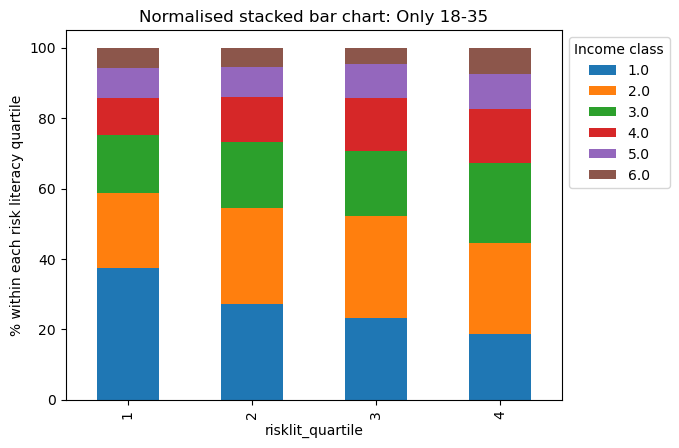

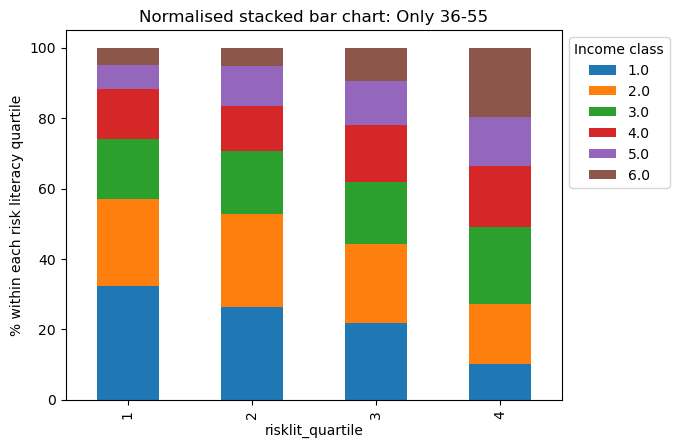

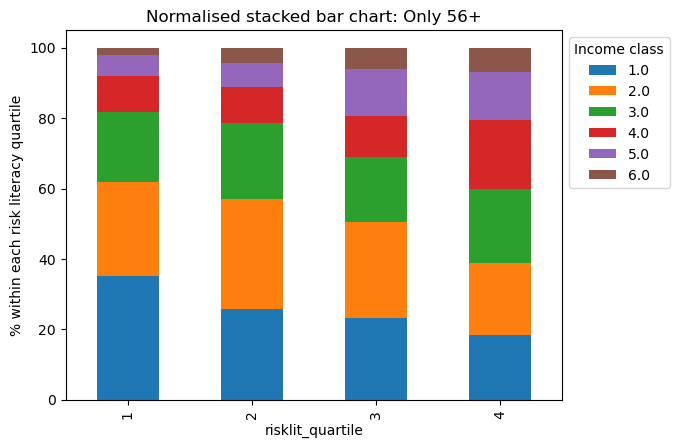

In [ ]:
# fig, axes = plt.subplots(3, 1, figsize = [12, 4*6])
# axes = axes.flatten()

for i, age_class in enumerate(age_rec):
    if age_class == 0:
        sample = data.copy()
    else:
        sample = data.loc[ data["age_rec"] == age_class].copy()
    sample_ready = sample.groupby("risklit_quartile")["income"].value_counts().to_frame().sort_index()
    sample_ready = sample_ready.unstack(level = "income")
    sample_ready.columns = sample_ready.columns.droplevel(0)
    sample_ready = sample_ready.div(sample_ready.sum(axis = 1), axis = 0)*100
    sample_ready.plot(kind='bar', stacked=True)

    plt.ylabel("% within each risk literacy quartile")
    plt.title(f"Normalised stacked bar chart: {age_dict[age_class]}")
    plt.legend(title="Income class", bbox_to_anchor=(1, 1))
    
plt.show()

---

---

---

---

## Table 4.1 - Per country per wealth quartile: M proportion of maximum score + SD + Median scores (Ver. 1)

Note: Wealth Class has been filtered out of entries who opted out of disclosing their income, and a quartile on the resulting data has been created

In [ ]:
wealth_filtered = main.loc[ ~pd.isnull(main["wealth_quartile"])].copy().reset_index()
wealth_filtered

,index,responseid,country_text,age,age_rec,isced,income,wealth,Certainty_5,Uncertainty_2,RiskComprehension_5,GraphLiteracy_3,Numeracy_3,Bayesianreasoning_1,Certainty_%,Uncertainty_%,RiskComprehension_%,GraphLiteracy_%,Numeracy_%,Bayesianreasoning_%,TotalScore_19,TotalScore_%,wealth_quartile
0,0,0,India,30.0,2,1,2.0,5000000.0,2,0,1,2,1,1,40.0,0.0,20.0,66.666667,33.333333,100.0,7,36.842105,4.0
1,1,1,India,53.0,3,1,4.0,9000000.0,4,0,2,1,0,1,80.0,0.0,40.0,33.333333,0.000000,100.0,8,42.105263,4.0
2,2,2,India,43.0,3,2,1.0,2200000.0,4,1,3,3,2,0,80.0,50.0,60.0,100.000000,66.666667,0.0,13,68.421053,3.0
3,3,3,India,32.0,2,2,3.0,8000000.0,4,0,1,1,3,0,80.0,0.0,20.0,33.333333,100.000000,0.0,9,47.368421,4.0
4,4,4,India,31.0,2,1,3.0,35000000.0,3,1,2,1,1,0,60.0,50.0,40.0,33.333333,33.333333,0.0,8,42.105263,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2881,3896,14390,France,73.0,4,2,5.0,15000.0,1,1,3,1,2,0,20.0,50.0,60.0,33.333333,66.666667,0.0,8,42.105263,2.0
2882,3897,14396,France,73.0,4,2,0.0,500000.0,1,1,3,2,3,0,20.0,50.0,60.0,66.666667,100.000000,0.0,10,52.631579,4.0
2883,3898,14419,France,68.0,4,2,4.0,400000.0,1,0,2,2,2,0,20.0,0.0,40.0,66.666667,66.666667,0.0,7,36.842105,4.0
2884,3900,15573,Germany,49.0,3,1,4.0,0.0,1,1,2,3,3,0,20.0,50.0,40.0,100.000000,100.000000,0.0,10,52.631579,1.0


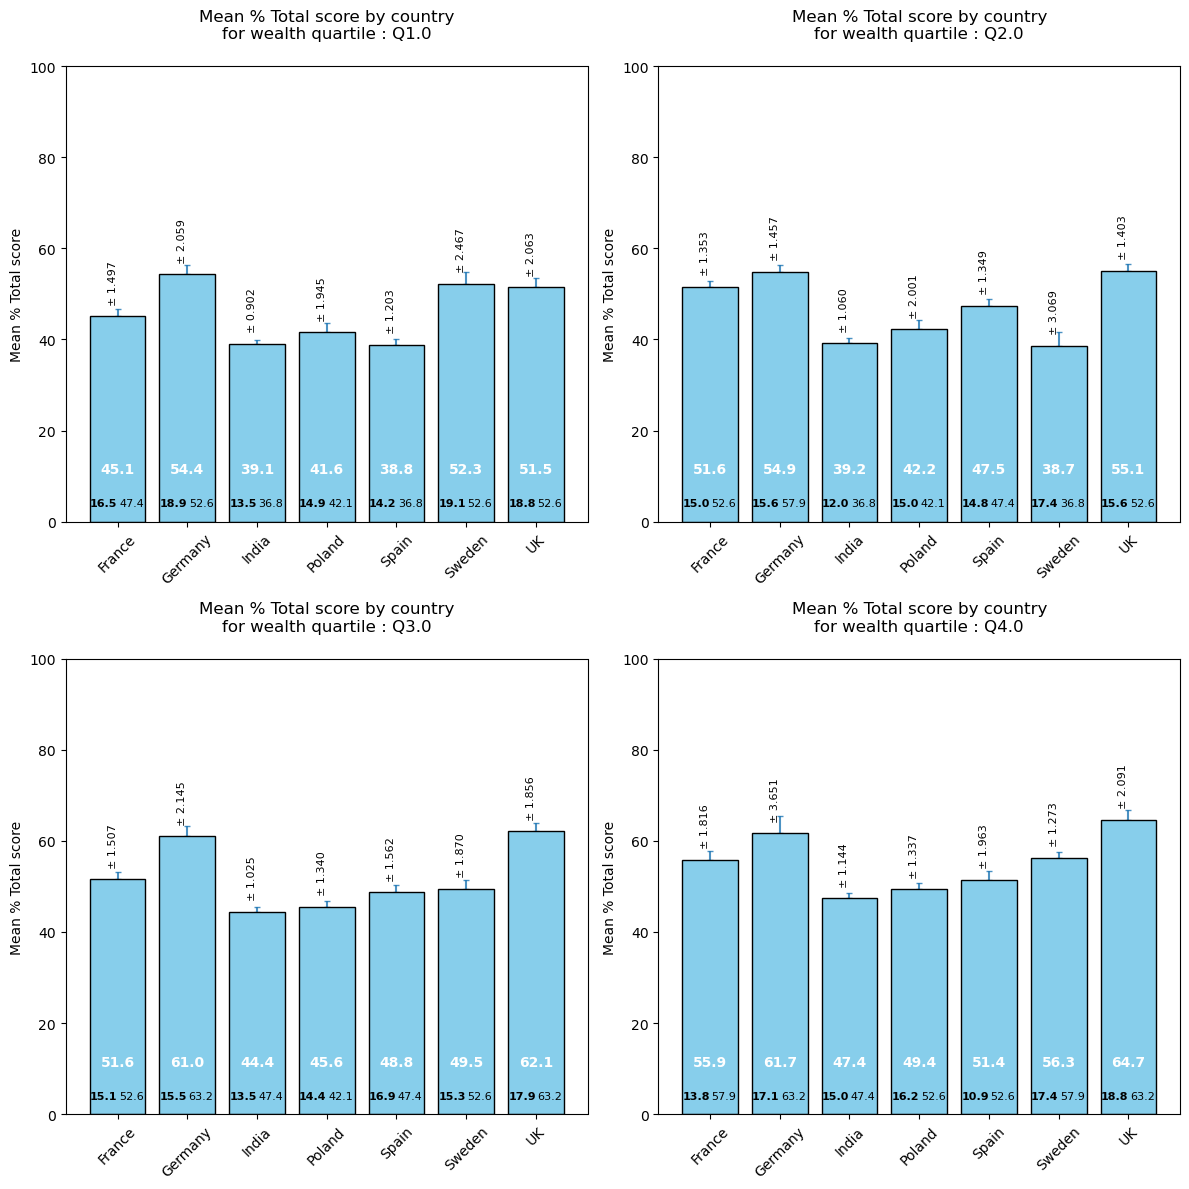

In [ ]:
fig, axes = plt.subplots(2, 2, figsize = [12, 6*2])
axes = axes.flatten()
wealth_quartiles = sorted(wealth_filtered["wealth_quartile"].unique())

for i, wealth_quartile in enumerate(wealth_quartiles):
    sample = wealth_filtered.loc[ wealth_filtered["wealth_quartile"] == wealth_quartile].copy()
    
    mean_scores = sample.groupby("country_text")["TotalScore_%"].mean().sort_index()
    std_scores = sample.groupby("country_text")["TotalScore_%"].std().reindex(mean_scores.index)
    sem_scores = sample.groupby("country_text")["TotalScore_%"].sem().reindex(mean_scores.index)
    med_scores = sample.groupby("country_text")["TotalScore_%"].median().reindex(mean_scores.index)
    
    axes[i].bar(mean_scores.index, mean_scores.values, color="skyblue", edgecolor='black')
    axes[i].errorbar(mean_scores.index, mean_scores.values, yerr = [np.zeros_like(sem_scores), sem_scores],
                     fmt = "none", capsize = 2, alpha = 0.8, zorder = 0)

    y_max = 100
    axes[i].set_yticks(np.arange(0, 101, step = 20))
    axes[i].tick_params(axis = "x", rotation = 45)
    
    for j, (mean, std, sem, med) in enumerate(zip(mean_scores.values, std_scores.values, sem_scores.values, med_scores.values)):
        axes[i].text(j, mean + 0.025 * y_max, f"± {sem:.3f}", ha = "right", va = "bottom", fontsize=8, color="black", rotation = 90)
        axes[i].text(j, 0.1 * y_max, f"{mean:.1f}", ha = "center", va = "bottom",
                     color='white', fontsize=10, fontweight='bold')
        axes[i].text(j - 0.2, 0.03 * y_max, f"{std:.1f}", ha = "center", va = "bottom",
                     color='black', fontsize=8, fontweight='bold')
        axes[i].text(j + 0.2, 0.03 * y_max, f"{med:.1f}", ha = "center", va = "bottom",
                     color='black', fontsize=8)
        
    
    axes[i].set_title(f"Mean % Total score by country\nfor wealth quartile : Q{wealth_quartile}", pad = 20)
    axes[i].set_ylabel("Mean % Total score")

plt.tight_layout()
plt.show()

---

## Table 4.1 - Per country per wealth quartile: M proportion of maximum score + SD + Median scores (Ver. 2)

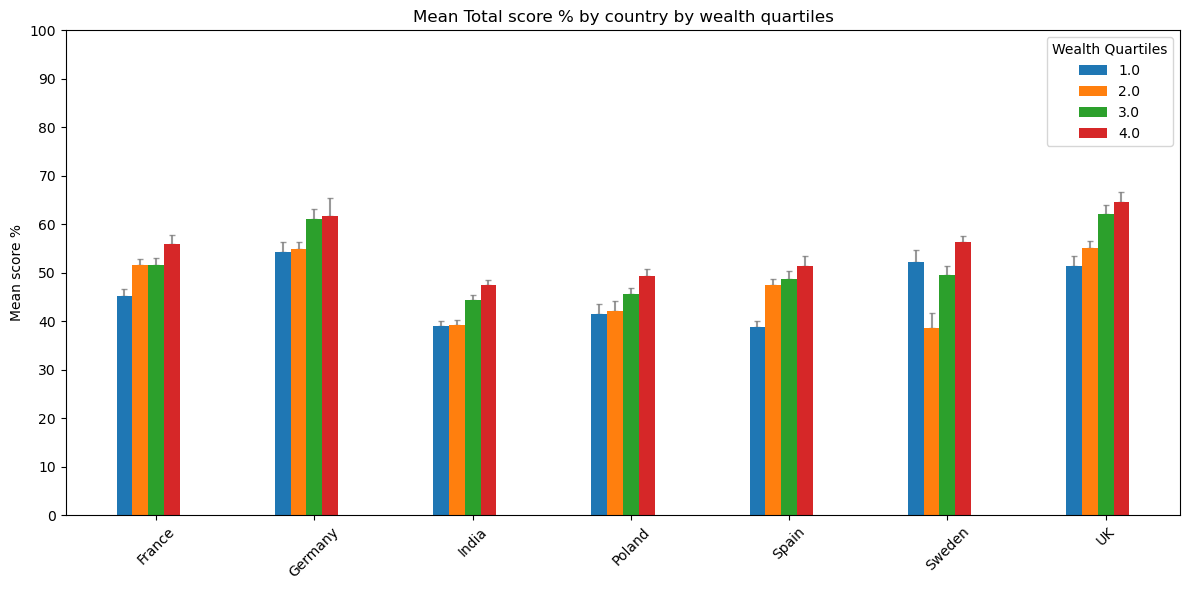

In [ ]:
fig, axes = plt.subplots(1, 1, figsize = [12, 6])
sample = wealth_filtered.copy()
wealth_quartiles = sorted(wealth_filtered["wealth_quartile"].unique())


data_mean = sample.groupby(["country_text", "wealth_quartile"])["TotalScore_%"].mean().sort_index()
data_std = sample.groupby(["country_text", "wealth_quartile"])["TotalScore_%"].std().reindex(data_mean.index)
data_sem = sample.groupby(["country_text", "wealth_quartile"])["TotalScore_%"].sem().reindex(data_mean.index)

countries = sorted(sample["country_text"].unique())
x = np.arange(1, len(countries) + 1)
width = 0.1

for j, wealth_quartile in enumerate(wealth_quartiles):
    mean_facet_scores = data_mean.xs(key=wealth_quartile, level="wealth_quartile")
    sem_facet_scores = data_sem.xs(key=wealth_quartile, level="wealth_quartile")

    offset = (- len(wealth_quartiles)/ 2 + j) * width
    axes.bar(x + offset , mean_facet_scores, width, label = str(wealth_quartile))
    axes.errorbar(x + offset , mean_facet_scores, yerr = [np.zeros_like(sem_facet_scores), sem_facet_scores],
                  fmt = "none", capsize = 2.5, alpha = 0.8, zorder = 0, ecolor = "grey")


axes.set_yticks(np.arange(0, 101, step = 10))
axes.set_xticks(x)
axes.set_xticklabels(countries, rotation = 45, ha = "center")

axes.set_ylabel(f"Mean score %")
axes.set_title(f"Mean Total score % by country by wealth quartiles")
axes.legend(title="Wealth Quartiles", bbox_to_anchor=(1.0, 1))

plt.tight_layout()
plt.show()


---

## Table 4.2 - Per country per wealth quartile: M proportion of facet score + SD + Median

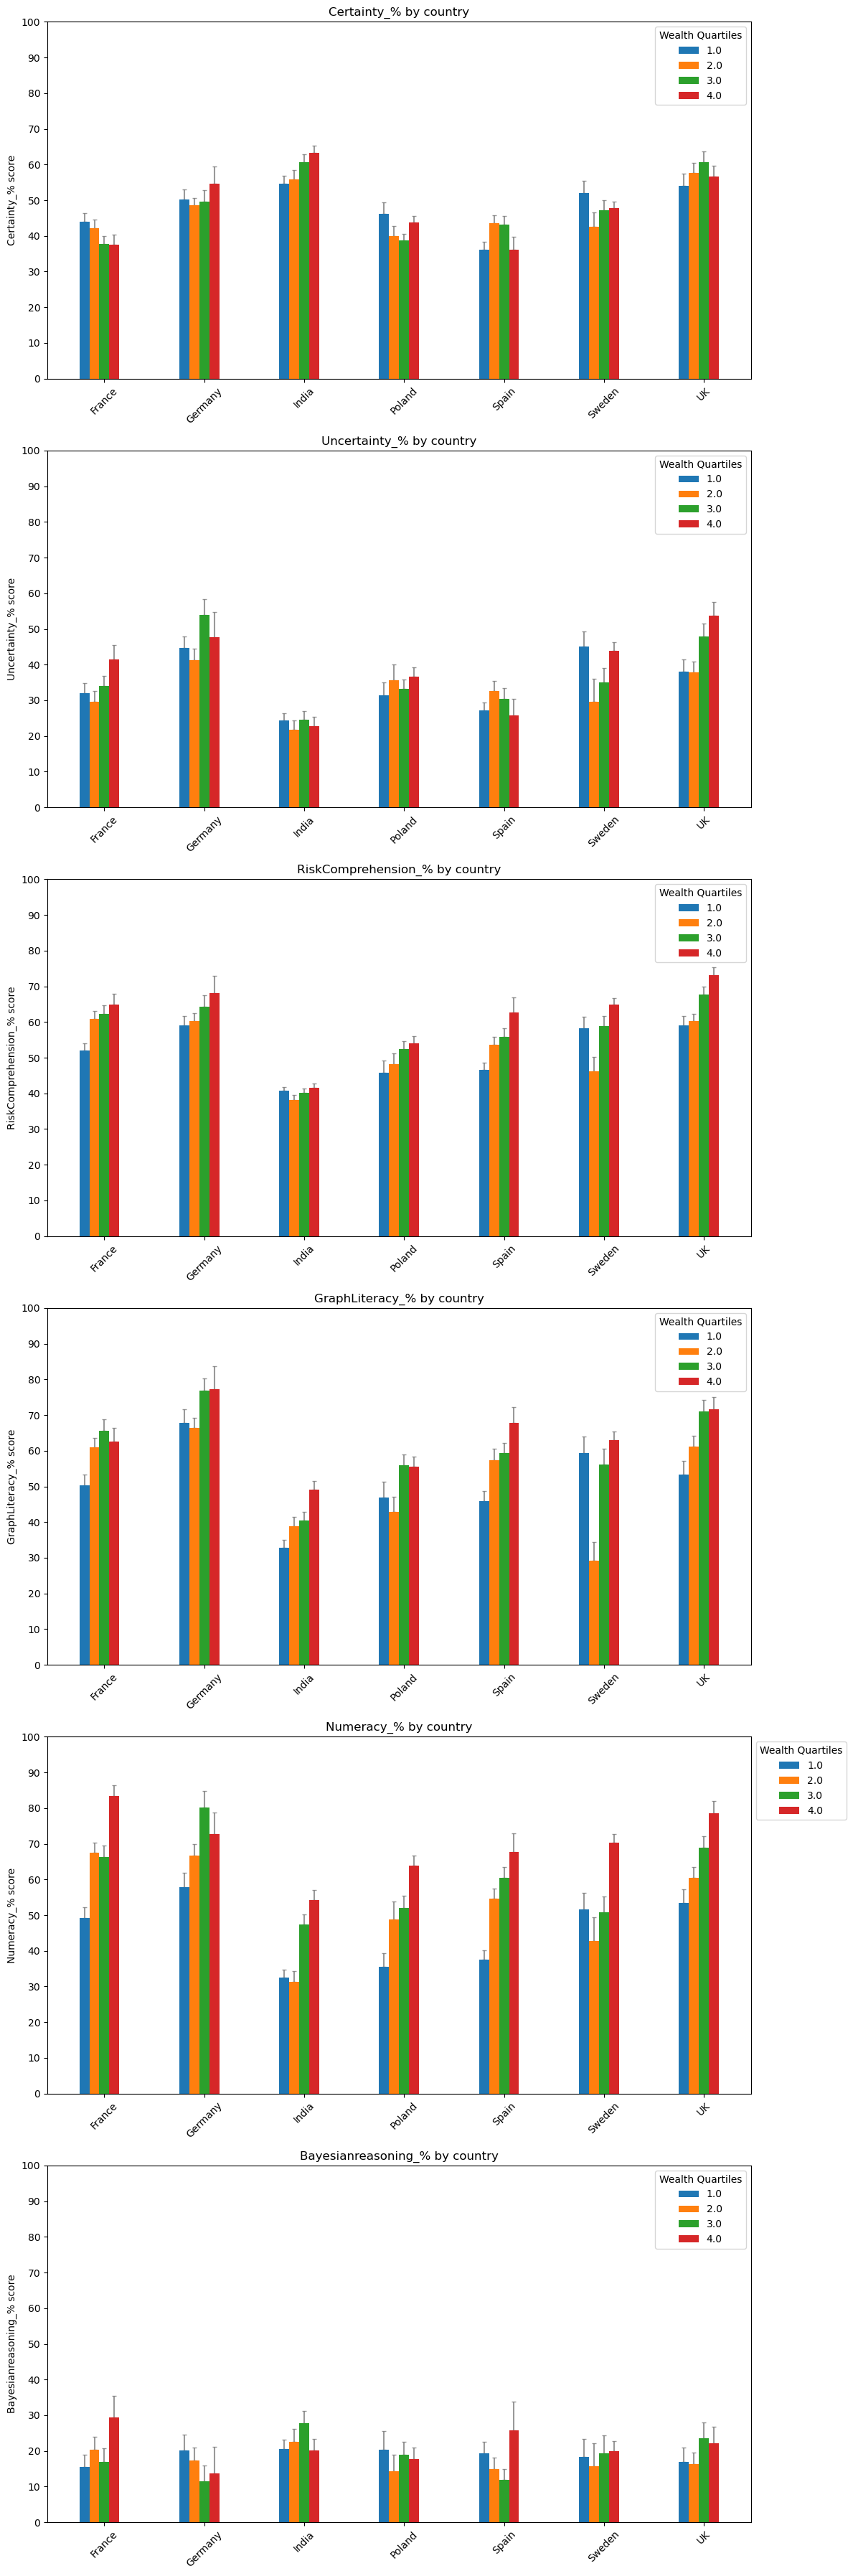

In [ ]:
fig, axes = plt.subplots(6, 1, figsize = [12, 6*6])

axes = axes.flatten()
wealth_quartiles = sorted(wealth_filtered["wealth_quartile"].unique())

for i, facet in enumerate(facet_percent_cols):

    sample = wealth_filtered.loc[ :, [facet] + ["country_text", "wealth_quartile"]].copy().reset_index()
    
    data_mean = sample.groupby(["country_text", "wealth_quartile"])[facet].mean().sort_index()
    data_std = sample.groupby(["country_text", "wealth_quartile"])[facet].std().reindex(data_mean.index)
    data_sem = sample.groupby(["country_text", "wealth_quartile"])[facet].sem().reindex(data_mean.index)
    
    countries = sorted(sample["country_text"].unique())
    x = np.arange(1, len(countries) + 1)
    width = 0.1
    
    for j, wealth_quartile in enumerate(wealth_quartiles):
        mean_facet_scores = data_mean.xs(key=wealth_quartile, level="wealth_quartile")
        sem_facet_scores = data_sem.xs(key=wealth_quartile, level="wealth_quartile")
    
        offset = (- len(wealth_quartiles)/ 2 + j) * width
        axes[i].bar(x + offset , mean_facet_scores, width, label = str(wealth_quartile))
        axes[i].errorbar(x + offset , mean_facet_scores, yerr = [np.zeros_like(sem_facet_scores), sem_facet_scores],
                      fmt = "none", capsize = 2.5, alpha = 0.8, zorder = 0, ecolor = "grey")

    
    axes[i].set_yticks(np.arange(0, 101, step = 10))
    axes[i].set_xticks(x)
    axes[i].set_xticklabels(countries, rotation = 45, ha = "center")
    
    axes[i].set_ylabel(f"{facet} score")
    axes[i].set_title(f"{facet} by country")
    axes[i].legend(title="Wealth Quartiles", bbox_to_anchor=(1.0, 1))

plt.tight_layout()
plt.show()



---

---

## Table 5.1: (Countries pooled): Relationship to total sum score and controlling for education and age using income 

In [ ]:
wealth_filtered = main.loc[ ~(main["wealth"] == -1)].copy().reset_index()
wealth_quartile = pd.qcut(wealth_filtered["wealth"],q = 4, labels = False, duplicates = "raise") + 1
wealth_filtered["wealth_quartile"] = wealth_quartile.copy()

In [ ]:
wealth_filtered = main.loc[ ~(main["wealth"] == -1)].copy().reset_index()
wealth_quartile = pd.qcut(wealth_filtered["wealth"],q = 4, labels = False, duplicates = "raise") + 1
wealth_filtered["wealth_quartile"] = wealth_quartile.copy()

risklit_quartile = pd.qcut(wealth_filtered["TotalScore_19"],q = 4, labels = False ) + 1
wealth_filtered["risklit_quartile"] = risklit_quartile.copy()

data = wealth_filtered.copy()

# Age group 2 = 18 to 35 y/o
# Age group 3 = 36 to 55 y/o
# Age group 4 = 56 to 75 y/o 

age_rec = [0] + sorted(data["age_rec"].unique())
age_dict = {0:"ALL Age", 2:"Only 18-35",
            3:"Only 36-55", 4:"Only 56+"}

In [ ]:
# # fig, axes = plt.subplots(3, 1, figsize = [12, 4*6])
# # axes = axes.flatten()

# for i, age_class in enumerate(age_rec):
#     if age_class == 0:
#         sample = data.copy()
#     else:
#         sample = data.loc[ data["age_rec"] == age_class].copy()
#     sample_ready = sample.groupby("risklit_quartile")["wealth_quartile"].value_counts().to_frame().sort_index()
#     sample_ready = sample_ready.unstack(level = "wealth_quartile")
#     sample_ready.columns = sample_ready.columns.droplevel(0)
#     sample_ready.plot(kind='bar', stacked=True)

#     plt.ylabel("count each risk literacy quartile")
#     plt.xlabel("Risk quartile")
#     plt.title(f"Stacked bar chart: {age_dict[age_class]}")
#     plt.legend(title="Wealth quartiles", bbox_to_anchor=(1, 1))
    
# plt.show()

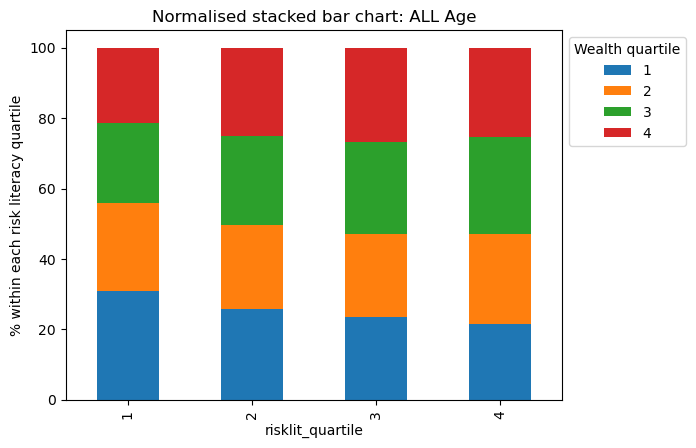

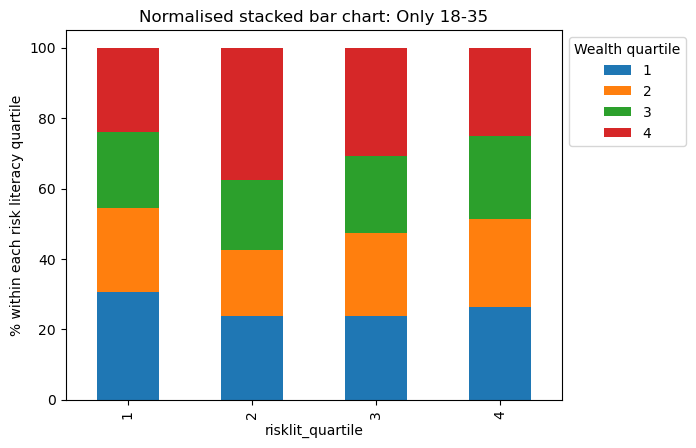

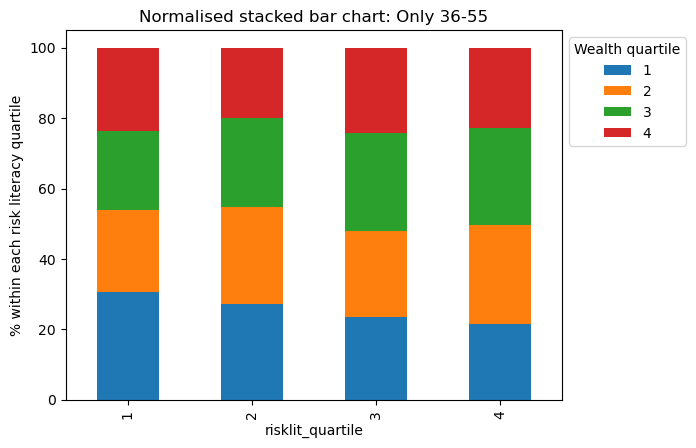

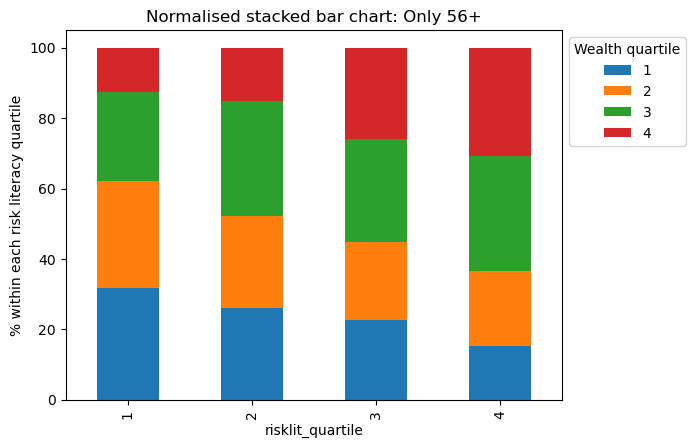

In [ ]:
# fig, axes = plt.subplots(3, 1, figsize = [12, 4*6])
# axes = axes.flatten()

for i, age_class in enumerate(age_rec):
    if age_class == 0:
        sample = data.copy()
    else:
        sample = data.loc[ data["age_rec"] == age_class].copy()
    sample_ready = sample.groupby("risklit_quartile")["wealth_quartile"].value_counts().to_frame().sort_index()
    sample_ready = sample_ready.unstack(level = "wealth_quartile")
    sample_ready.columns = sample_ready.columns.droplevel(0)
    sample_ready = sample_ready.div(sample_ready.sum(axis = 1), axis = 0)*100
    sample_ready.plot(kind='bar', stacked=True)

    plt.ylabel("% within each risk literacy quartile")
    plt.title(f"Normalised stacked bar chart: {age_dict[age_class]}")
    plt.legend(title="Wealth quartile", bbox_to_anchor=(1, 1))
    
plt.show()

---

---

---

---

## Ordinal Logistic Regression (Proportional Odds Model) of Ordered Income Class depending on Risk literacy without, and with control of education, and with education and age

### V1: Without any control variables

In [ ]:
import statsmodels.api as sm
from statsmodels.miscmodels.ordinal_model import OrderedModel

data = income_filtered.copy()

data["income"] = pd.Categorical(data["income"], ordered=True)

model = OrderedModel(data["income"], data["risklit_quartile"],
                     distr='logit')

res = model.fit(method='bfgs')
print(res.summary())


Optimization terminated successfully.
         Current function value: 1.679669
         Iterations: 16
         Function evaluations: 18
         Gradient evaluations: 18
                             OrderedModel Results                             
Dep. Variable:                 income   Log-Likelihood:                -6836.3
Model:                   OrderedModel   AIC:                         1.368e+04
Method:            Maximum Likelihood   BIC:                         1.372e+04
Date:                Tue, 17 Jun 2025                                         
Time:                        18:12:12                                         
No. Observations:                4070                                         
Df Residuals:                    4064                                         
Df Model:                           1                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------

### V2: With control of education

In [ ]:
import statsmodels.api as sm
from statsmodels.miscmodels.ordinal_model import OrderedModel

data = income_filtered.copy()

data["income"] = pd.Categorical(data["income"], ordered=True)

model = OrderedModel(data["income"], data[["risklit_quartile", "isced"]],
                     distr='logit')

res = model.fit(method='bfgs')
print(res.summary())

Optimization terminated successfully.
         Current function value: 1.647207
         Iterations: 24
         Function evaluations: 25
         Gradient evaluations: 25
                             OrderedModel Results                             
Dep. Variable:                 income   Log-Likelihood:                -6704.1
Model:                   OrderedModel   AIC:                         1.342e+04
Method:            Maximum Likelihood   BIC:                         1.347e+04
Date:                Tue, 17 Jun 2025                                         
Time:                        18:12:12                                         
No. Observations:                4070                                         
Df Residuals:                    4063                                         
Df Model:                           2                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------

### V3: With control of education and age

In [ ]:
import statsmodels.api as sm
from statsmodels.miscmodels.ordinal_model import OrderedModel

data = income_filtered.copy()

data["income"] = pd.Categorical(data["income"], ordered=True)

model = OrderedModel(data["income"], data[["risklit_quartile", "isced", "age_rec"]],
                     distr='logit')

# Age group 2 = 18 to 35 y/o
# Age group 3 = 36 to 55 y/o
# Age group 4 = 56 to 75 y/o 

res = model.fit(method='bfgs')
print(res.summary())

Optimization terminated successfully.
         Current function value: 1.645930
         Iterations: 30
         Function evaluations: 31
         Gradient evaluations: 31
                             OrderedModel Results                             
Dep. Variable:                 income   Log-Likelihood:                -6698.9
Model:                   OrderedModel   AIC:                         1.341e+04
Method:            Maximum Likelihood   BIC:                         1.346e+04
Date:                Tue, 17 Jun 2025                                         
Time:                        18:12:12                                         
No. Observations:                4070                                         
Df Residuals:                    4062                                         
Df Model:                           3                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------

---

## Ordinal Logistic Regression (Proportional Odds Model) of Ordered Income Class depending on Risk literacy without, and under control of education, FOR 36-55 years old, where we can assume skill-related variance

### V1: without control of education

In [ ]:
data = income_filtered.loc[income_filtered["age_rec"] == 3].copy()

data["income"] = pd.Categorical(data["income"], ordered=True)

model = OrderedModel(data["income"], data["risklit_quartile"],
                     distr='logit')

res = model.fit(method='bfgs')
print(res.summary())

Optimization terminated successfully.
         Current function value: 1.709516
         Iterations: 16
         Function evaluations: 18
         Gradient evaluations: 18
                             OrderedModel Results                             
Dep. Variable:                 income   Log-Likelihood:                -2976.3
Model:                   OrderedModel   AIC:                             5965.
Method:            Maximum Likelihood   BIC:                             5997.
Date:                Tue, 17 Jun 2025                                         
Time:                        18:12:12                                         
No. Observations:                1741                                         
Df Residuals:                    1735                                         
Df Model:                           1                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------

### V1: with control of education

In [ ]:
data = income_filtered.loc[income_filtered["age_rec"] == 3].copy()

data["income"] = pd.Categorical(data["income"], ordered=True)

model = OrderedModel(data["income"], data[["risklit_quartile", "isced"]],
                     distr='logit')

res = model.fit(method='bfgs')
print(res.summary())

Optimization terminated successfully.
         Current function value: 1.674953
         Iterations: 24
         Function evaluations: 25
         Gradient evaluations: 25
                             OrderedModel Results                             
Dep. Variable:                 income   Log-Likelihood:                -2916.1
Model:                   OrderedModel   AIC:                             5846.
Method:            Maximum Likelihood   BIC:                             5884.
Date:                Tue, 17 Jun 2025                                         
Time:                        18:12:12                                         
No. Observations:                1741                                         
Df Residuals:                    1734                                         
Df Model:                           2                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------

---

---

---

## Ordinal Logistic Regression (Proportional Odds Model) of Ordered Wealth Quartiles depending on Risk literacy without, and with control of education, and with education and age

### V1: Without any control variables

In [ ]:
import statsmodels.api as sm
from statsmodels.miscmodels.ordinal_model import OrderedModel

data = wealth_filtered.copy()

data["wealth_quartile"] = pd.Categorical(data["wealth_quartile"], ordered=True)

model = OrderedModel(data["wealth_quartile"], data["risklit_quartile"],
                     distr='logit')

res = model.fit(method='bfgs')
print(res.summary())


Optimization terminated successfully.
         Current function value: 1.383019
         Iterations: 13
         Function evaluations: 15
         Gradient evaluations: 15
                             OrderedModel Results                             
Dep. Variable:        wealth_quartile   Log-Likelihood:                -3991.4
Model:                   OrderedModel   AIC:                             7991.
Method:            Maximum Likelihood   BIC:                             8015.
Date:                Tue, 17 Jun 2025                                         
Time:                        18:12:13                                         
No. Observations:                2886                                         
Df Residuals:                    2882                                         
Df Model:                           1                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------

### V2: With control of education

In [ ]:
import statsmodels.api as sm
from statsmodels.miscmodels.ordinal_model import OrderedModel

data = wealth_filtered.copy()

data["wealth_quartile"] = pd.Categorical(data["wealth_quartile"], ordered=True)

model = OrderedModel(data["wealth_quartile"], data[["risklit_quartile", "isced"]],
                     distr='logit')

res = model.fit(method='bfgs')
print(res.summary())

Optimization terminated successfully.
         Current function value: 1.365240
         Iterations: 16
         Function evaluations: 18
         Gradient evaluations: 18
                             OrderedModel Results                             
Dep. Variable:        wealth_quartile   Log-Likelihood:                -3940.1
Model:                   OrderedModel   AIC:                             7890.
Method:            Maximum Likelihood   BIC:                             7920.
Date:                Tue, 17 Jun 2025                                         
Time:                        18:12:13                                         
No. Observations:                2886                                         
Df Residuals:                    2881                                         
Df Model:                           2                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------

### V3: With control of education and age

In [ ]:
import statsmodels.api as sm
from statsmodels.miscmodels.ordinal_model import OrderedModel

data = wealth_filtered.copy()

data["wealth_quartile"] = pd.Categorical(data["wealth_quartile"], ordered=True)

model = OrderedModel(data["wealth_quartile"], data[["risklit_quartile", "isced", "age_rec"]],
                     distr='logit')

# Age group 2 = 18 to 35 y/o
# Age group 3 = 36 to 55 y/o
# Age group 4 = 56 to 75 y/o 

res = model.fit(method='bfgs')
print(res.summary())

Optimization terminated successfully.
         Current function value: 1.365240
         Iterations: 22
         Function evaluations: 23
         Gradient evaluations: 23
                             OrderedModel Results                             
Dep. Variable:        wealth_quartile   Log-Likelihood:                -3940.1
Model:                   OrderedModel   AIC:                             7892.
Method:            Maximum Likelihood   BIC:                             7928.
Date:                Tue, 17 Jun 2025                                         
Time:                        18:12:13                                         
No. Observations:                2886                                         
Df Residuals:                    2880                                         
Df Model:                           3                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------

---

## Ordinal Logistic Regression (Proportional Odds Model) of Ordered Wealth Quartiles depending on Risk literacy without, and under control of education, FOR 36-55 years old, where we can assume skill-related variance

### V1: without control of education

In [ ]:
data = wealth_filtered.loc[wealth_filtered["age_rec"] == 3].copy()

data["wealth_quartile"] = pd.Categorical(data["wealth_quartile"], ordered=True)

model = OrderedModel(data["wealth_quartile"], data["risklit_quartile"],
                     distr='logit')

res = model.fit(method='bfgs')
print(res.summary())

Optimization terminated successfully.
         Current function value: 1.383518
         Iterations: 12
         Function evaluations: 14
         Gradient evaluations: 14
                             OrderedModel Results                             
Dep. Variable:        wealth_quartile   Log-Likelihood:                -1640.9
Model:                   OrderedModel   AIC:                             3290.
Method:            Maximum Likelihood   BIC:                             3310.
Date:                Tue, 17 Jun 2025                                         
Time:                        18:12:13                                         
No. Observations:                1186                                         
Df Residuals:                    1182                                         
Df Model:                           1                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------

### V1: with control of education

In [ ]:
data = wealth_filtered.loc[wealth_filtered["age_rec"] == 3].copy()

data["wealth_quartile"] = pd.Categorical(data["wealth_quartile"], ordered=True)

model = OrderedModel(data["wealth_quartile"], data[["risklit_quartile", "isced"]],
                     distr='logit')

res = model.fit(method='bfgs')
print(res.summary())

Optimization terminated successfully.
         Current function value: 1.352780
         Iterations: 17
         Function evaluations: 18
         Gradient evaluations: 18
                             OrderedModel Results                             
Dep. Variable:        wealth_quartile   Log-Likelihood:                -1604.4
Model:                   OrderedModel   AIC:                             3219.
Method:            Maximum Likelihood   BIC:                             3244.
Date:                Tue, 17 Jun 2025                                         
Time:                        18:12:13                                         
No. Observations:                1186                                         
Df Residuals:                    1181                                         
Df Model:                           2                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------